In [7]:
import os
import re
import seaborn as sb
import cPickle
import pickle
from pyitlib import discrete_random_variable as drv

In [6]:
import TuningTools

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

PreProc 2.1.2


In [8]:
#import tensorflow
import pandas as pd
import numpy
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6
import matplotlib.pyplot as plt
import time
#import statsmodels
#from statsmodels.tsa.stattools import adfuller
#import statsmodels.api as sm
import scipy
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn import metrics

In [9]:
import keras
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam, SGD
import keras.callbacks as callbacks
from keras.utils import np_utils
from keras.models import load_model
from keras import backend as K

In [10]:
dirout = '/home/caducovas/DeepRinger/results/plots'

In [7]:
###validation data
dirin='/home/caducovas/DeepRinger/data/'
val_data_sort_0 = np.load(dirin+"val_Data_sort_0_hidden_neurons_77.npy")
val_data_sort_1 = np.load(dirin+"val_Data_sort_1_hidden_neurons_77.npy")
val_data_sort_2 = np.load(dirin+"val_Data_sort_2_hidden_neurons_77.npy")
val_data_sort_3 = np.load(dirin+"val_Data_sort_3_hidden_neurons_77.npy")
val_data_sort_4 = np.load(dirin+"val_Data_sort_4_hidden_neurons_77.npy")
val_data_sort_5 = np.load(dirin+"val_Data_sort_5_hidden_neurons_77.npy")
val_data_sort_6 = np.load(dirin+"val_Data_sort_6_hidden_neurons_77.npy")
val_data_sort_7 = np.load(dirin+"val_Data_sort_7_hidden_neurons_77.npy")
val_data_sort_8 = np.load(dirin+"val_Data_sort_8_hidden_neurons_77.npy")
val_data_sort_9 = np.load(dirin+"val_Data_sort_9_hidden_neurons_77.npy")


In [8]:
va_data = {}
va_data[0] = val_data_sort_0
va_data[1] = val_data_sort_1
va_data[2] = val_data_sort_2
va_data[3] = val_data_sort_3
va_data[4] = val_data_sort_4
va_data[5] = val_data_sort_5
va_data[6] = val_data_sort_6
va_data[7] = val_data_sort_7
va_data[8] = val_data_sort_8
va_data[9] = val_data_sort_9

In [7]:
dirin='/home/caducovas/DeepRinger/data/run_layer1/'
model_100X80 = load_model(dirin+'RawData_1_folds_1_inits_500_epochs_26102_batch_size_tanh_hidden_activation_linear_output_activation_kullback_leibler_divergence_metric_mean_squared_error_loss_100x80_neurons_sort_7_etbin_2_etabin_0_model.h5')

In [9]:
model_100X80.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                8080      
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               8100      
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
Total params: 16,180
Trainable params: 16,180
Non-trainable params: 0
_________________________________________________________________


In [41]:
neurons = []

reconstruct = {}
predict_data = {}

#layer = '40x20'
dirin='/home/caducovas/DeepRinger/data/run_layer1/'
layers = ['100x100','100x95','100x90','100x85','100x80','100x70','100x60','100x50','100x40','100x30','100x20','100x10']

for layer in layers:
    print "Layer: "+str(layer)
    neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer)]
    predict_data = {}
    for file in files:
        print "Sort: " +str(file.split('_')[27]) ###sort
        nsort = int(file.split('_')[27])
        model = load_model(dirin+file)
        predict_data[nsort] = model.predict(va_data[nsort], batch_size=va_data[nsort].shape[0], verbose=1)
    reconstruct[layer] = predict_data
 

Layer: 100x100
Sort: 0
339519/339519 [==============================] - 1s 3us/step
Sort: 4
339519/339519 [==============================] - 1s 3us/step
Sort: 9
339521/339521 [==============================] - 1s 3us/step
Sort: 1
339519/339519 [==============================] - 1s 4us/step
Sort: 6
339519/339519 [==============================] - 1s 3us/step
Sort: 3
339519/339519 [==============================] - 1s 4us/step
Sort: 2
339519/339519 [==============================] - 1s 4us/step
Sort: 5
339519/339519 [==============================] - 1s 4us/step
Sort: 7
339520/339520 [==============================] - 1s 4us/step
Sort: 8
339521/339521 [==============================] - 1s 4us/step
Layer: 100x95
Sort: 2
339519/339519 [==============================] - 1s 4us/step
Sort: 5
339519/339519 [==============================] - 1s 4us/step
Sort: 7
339520/339520 [==============================] - 1s 4us/step
Sort: 3
339519/339519 [==============================] - 1s 4us/step
Sort:

Sort: 5
339519/339519 [==============================] - 1s 4us/step
Sort: 4
339519/339519 [==============================] - 1s 4us/step
Sort: 1
339519/339519 [==============================] - 1s 4us/step


In [54]:
kl = []
for key in reconstruct['100x85'].keys():
    pdf,bins = KLDiv(val_data.T,output_layer.T)

0
1
2
3
4
5
6
7
8
9


In [57]:
norms[0]

array([[35268.78 ],
       [33726.535],
       [37657.418],
       ...,
       [29157.627],
       [34516.562],
       [34638.086]], dtype=float32)

# Starts here

In [11]:
### Create dictionaries to store the ringer data before and after normalization as well as the total energy 
beforenorm={}
afternorm={}
norms={}
dirin='/home/caducovas/DeepRinger/data/'

files = [f for f in os.listdir(dirin) if (f.endswith( ('.pic') ) and f.split('.')[1].split('_')[1] == '77')]
for file in files:
    f = open(dirin+file,'r')
    a = pickle.load(f)
    f.close()
    nsort=int(file.split('.')[3][-1])
    #a['tunedPP']['items'][0]['items'][0].keys()#['__module']
    beforenorm[nsort] = a['tunedPP']['items'][0]['items'][0]['_beforenorm'] #[0].shape
    afternorm[nsort] = a['tunedPP']['items'][0]['items'][0]['_afternorm'] #[0].shape
    norms[nsort] = a['tunedPP']['items'][0]['items'][0]['_normslist'] #[0].shape

In [191]:
neurons = []

reconstruct = {}
predict_data = {}

#layer = '40x20'
dirin='/home/caducovas/DeepRinger/data/run_layer1/adam1/'
#layers = ['100x100','100x95','100x90','100x85','100x80','100x70','100x60','100x50','100x40','100x30','100x20','100x10','100x9','100x8','100x7','100x6','100x5','100x4','100x3']
layers = ['100x100','100x90','100x85','100x70','100x55','100x40','100x25','100x20','100x15','100x10','100x5','100x4','100x3','100x2']


for layer in layers:
    print "Layer: "+str(layer)
    neuron = int(layer.split('x')[1])
    #neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer)]
    predict_data = {}
    for file in files:
        print "Sort: " +str(file.split('_')[27]) ###sort
        nsort = int(file.split('_')[27])
        model = load_model(dirin+file)
        if isinstance(afternorm[nsort], (tuple, list,)):
            predict = []
            for i, cdata in enumerate(afternorm[nsort]):
                predict.append(model.predict(cdata, batch_size=cdata.shape[0], verbose=1))
        predict_data[nsort] = predict

        reconstruct[neuron] = predict_data

Layer: 100x100
Sort: 3
2900/2900 [==============================] - 0s 3us/step
Sort: 0
2900/2900 [==============================] - 0s 3us/step
Sort: 7
2901/2901 [==============================] - 0s 3us/step
Sort: 4
2900/2900 [==============================] - 0s 3us/step
Sort: 9
2901/2901 [==============================] - 0s 3us/step
Sort: 5
2900/2900 [==============================] - 0s 3us/step
Sort: 8
2901/2901 [==============================] - 0s 2us/step
Sort: 1
2900/2900 [==============================] - 0s 3us/step
Sort: 6
2900/2900 [==============================] - 0s 3us/step
Sort: 2
2900/2900 [==============================] - 0s 3us/step
Layer: 100x90
Sort: 9
2901/2901 [==============================] - 0s 3us/step
Sort: 4
2900/2900 [==============================] - 0s 3us/step
Sort: 0
2900/2900 [==============================] - 0s 3us/step
Sort: 3
2900/2900 [==============================] - 0s 3us/step
Sort: 8
2901/2901 [==============================] - 0s 3us/s

Sort: 2
2900/2900 [==============================] - 0s 3us/step
Sort: 1
2900/2900 [==============================] - 0s 3us/step
Sort: 4
2900/2900 [==============================] - 0s 2us/step
Sort: 0
2900/2900 [==============================] - 0s 3us/step
Sort: 3
2900/2900 [==============================] - 0s 3us/step
Sort: 9
2901/2901 [==============================] - 0s 2us/step
Layer: 100x20
Sort: 5
2900/2900 [==============================] - 0s 2us/step
Sort: 3
2900/2900 [==============================] - 0s 2us/step
Sort: 1
2900/2900 [==============================] - 0s 3us/step
Sort: 0
2900/2900 [==============================] - 0s 3us/step
Sort: 8
2901/2901 [==============================] - 0s 3us/step
Sort: 9
2901/2901 [==============================] - 0s 3us/step
Sort: 4
2900/2900 [==============================] - 0s 3us/step
Sort: 7
2901/2901 [==============================] - 0s 3us/step
Sort: 2
2900/2900 [==============================] - 0s 2us/step
Sort: 6
290

Sort: 5
2900/2900 [==============================] - 0s 2us/step
Sort: 9
2901/2901 [==============================] - 0s 2us/step
Layer: 100x2
Sort: 6
2900/2900 [==============================] - 0s 3us/step
Sort: 3
2900/2900 [==============================] - 0s 2us/step
Sort: 1
2900/2900 [==============================] - 0s 2us/step
Sort: 4
2900/2900 [==============================] - 0s 3us/step
Sort: 8
2901/2901 [==============================] - 0s 3us/step
Sort: 0
2900/2900 [==============================] - 0s 2us/step
Sort: 2
2900/2900 [==============================] - 0s 2us/step
Sort: 7
2901/2901 [==============================] - 0s 2us/step
Sort: 5
2900/2900 [==============================] - 0s 3us/step
Sort: 9
2901/2901 [==============================] - 0s 2us/step


In [144]:
afternorm[0][0].shape[0]

336619

# Propagate encoder to analyse new variables in reduced Dim

In [145]:
propagate = {}
prediction = {}

layers = ['100x2']#['100x100','100x90','100x85','100x70','100x55','100x40','100x25','100x10','100x3']
dirin='/home/caducovas/DeepRinger/data/run_layer1/adam1/'

for layer in layers:
    print "Layer: "+str(layer)
    neuron = int(layer.split('x')[1])
    #neurons.append(layer.split('x')[1])
    files = [f for f in os.listdir(dirin) if (f.endswith( ('.h5') ) and f.split('_')[24] == layer)]
    prediction = {}
    for file in files:
        print "Sort: " +str(file.split('_')[27]) ###sort
        nsort = int(file.split('_')[27])
        model = load_model(dirin+file)
        enc_weights = model.layers[0].get_weights()
        dec_weights = model.layers[2].get_weights()

        model1 = Sequential()
        model1.add(Dense(neuron, input_dim=afternorm[0][0].shape[1], weights=model.layers[0].get_weights()))
        #model1.add(Dense(100, weights=dec_weights_100X100))
        model1.add(Activation('tanh'))        
        
        if isinstance(afternorm[nsort], (tuple, list,)):
            predict = []
            for i, cdata in enumerate(afternorm[nsort]):
                predict.append(model1.predict(cdata, batch_size=cdata.shape[0], verbose=1))
        prediction[nsort] = predict
        
        propagate[neuron] = prediction
    





Layer: 100x2
Sort: 6
2900/2900 [==============================] - 0s 2us/step
Sort: 3
2900/2900 [==============================] - 0s 2us/step
Sort: 1
2900/2900 [==============================] - 0s 2us/step
Sort: 4
2900/2900 [==============================] - 0s 2us/step
Sort: 8
2901/2901 [==============================] - 0s 2us/step
Sort: 0
2900/2900 [==============================] - 0s 2us/step
Sort: 2
2900/2900 [==============================] - 0s 2us/step
Sort: 7
2901/2901 [==============================] - 0s 2us/step
Sort: 5
2900/2900 [==============================] - 0s 2us/step
Sort: 9
2901/2901 [==============================] - 0s 2us/step


In [194]:
propagate

{2: {0: [array([[ 0.04708998, -0.00602561],
          [-0.00888013,  0.01961487],
          [ 0.01105863, -0.00461906],
          ..., 
          [ 0.0681124 , -0.1367591 ],
          [ 0.01359629,  0.05051034],
          [-0.03225997, -0.01124275]], dtype=float32),
   array([[ 0.12756041,  0.00422876],
          [-0.003684  , -0.0097824 ],
          [ 0.06079515,  0.09480947],
          ..., 
          [ 0.06102185,  0.0158361 ],
          [ 0.06620723,  0.07248802],
          [-0.02073538,  0.11270323]], dtype=float32)],
  1: [array([[-0.1294786 ,  0.03510188],
          [-0.11082357, -0.09738   ],
          [ 0.05839512, -0.05287532],
          ..., 
          [-0.04121307,  0.10349303],
          [-0.01470394,  0.01891022],
          [ 0.01689616,  0.06826411]], dtype=float32),
   array([[-0.12761377,  0.07956509],
          [-0.09364193,  0.16560276],
          [-0.11820646,  0.04322541],
          ..., 
          [ 0.03419583,  0.06388985],
          [-0.12116753,  0.03668887],
 

# Print C 2

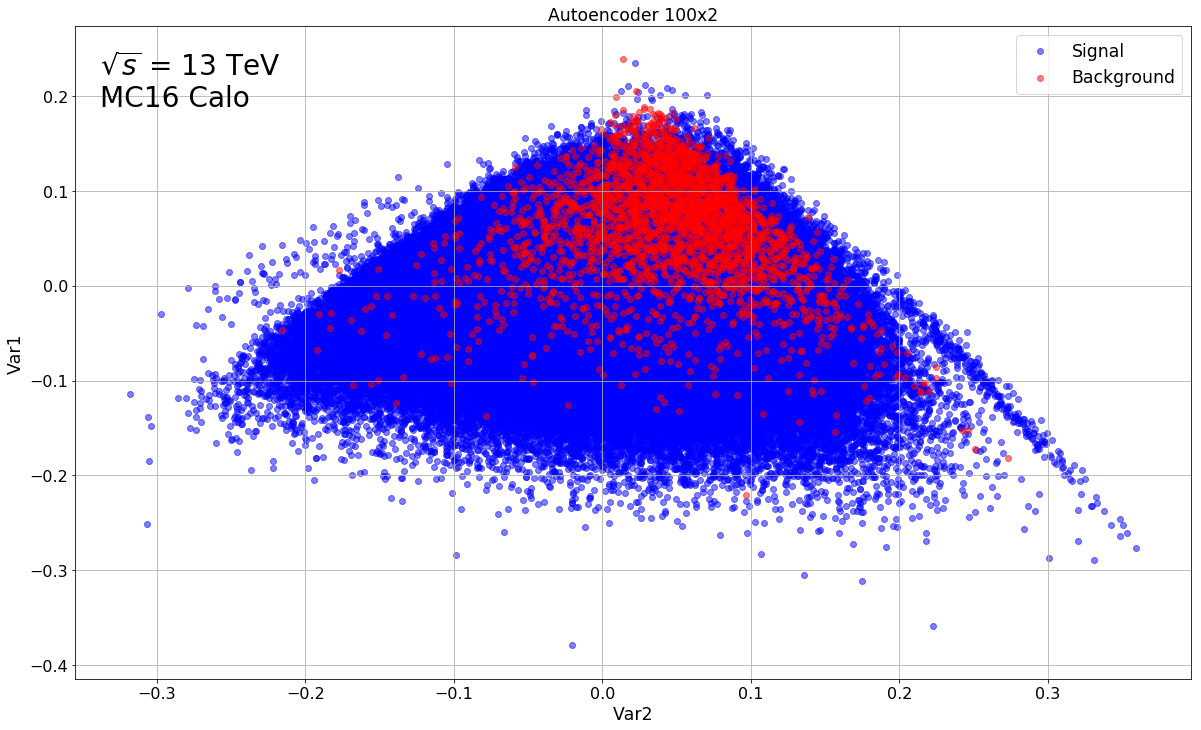

In [199]:
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

fig, ax = plt.subplots(figsize=(20, 12))
#fig1 = plt.figure(figsize=(20, 12))
#propagate[2][0][0].T[0].shape
x= propagate[2][0][0].T[0] 
y= propagate[2][0][0].T[1]
plt.scatter(x, y, c="b", alpha=0.5,label="Signal")

x= propagate[2][0][1].T[0] 
y= propagate[2][0][1].T[1]
plt.scatter(x, y, c="r", alpha=0.5,label="Background")
plt.legend(loc='best',fontsize = 'xx-large')
plt.tick_params(axis='both',labelsize=16)
plt.ylabel('Var1',fontsize= 'xx-large')
plt.xlabel('Var2',fontsize= 'xx-large')

plt.title('Autoencoder 100x2',fontsize= 'xx-large')

at = AnchoredText(r'$\sqrt{s}$ = 13 TeV'+"\nMC16 Calo",
                  prop=dict(size=28), frameon=False,
                  loc=2, 
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

    
plt.grid()



Var: 1
OK Var: 1


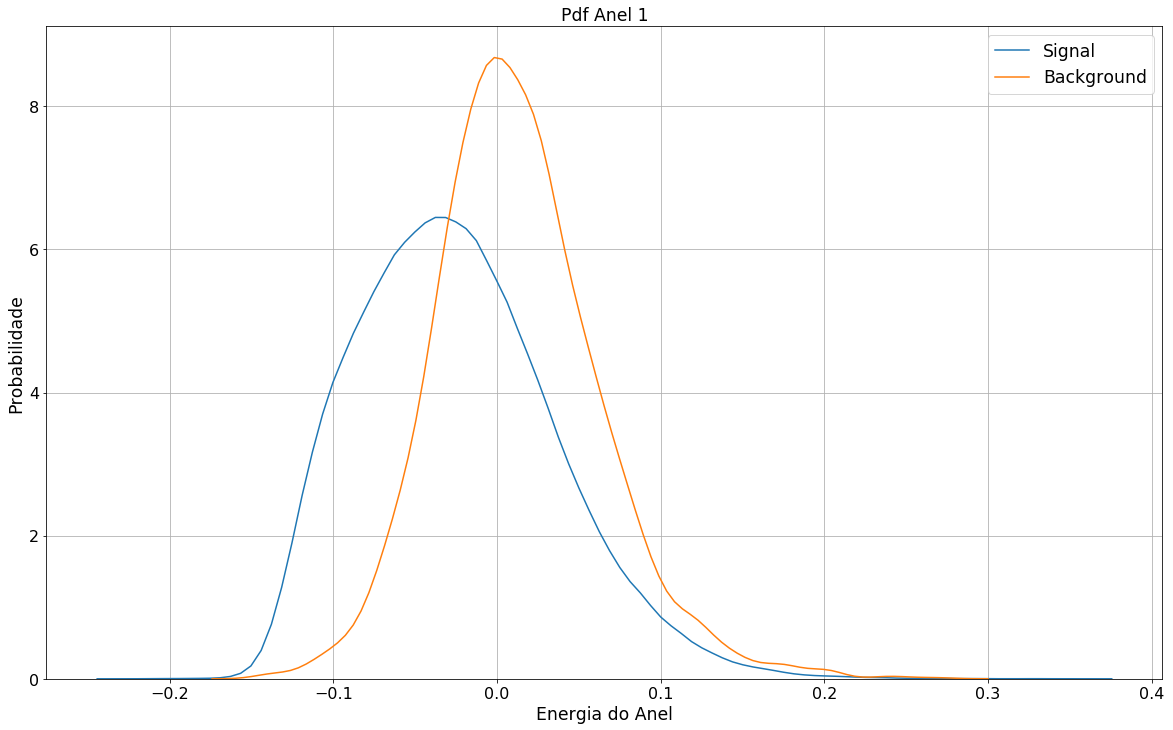

In [141]:
fig1 = plt.figure(figsize=(20, 12))
for i in range(1):#range(propagate[3][0][0].shape[1]):
    print 'Var: '+str(i+1)
    try:
        print 'OK Var: '+str(i+1)
        #fig1 = plt.figure(figsize=(20, 12))
        #i=0
        #sb.kdeplot(norm1_val_Data.T[i],shade=True,label="All")
        sb.kdeplot(propagate[3][0][0].T[2],label="Signal")
        #pdf, a = EstPDF(data[1].T[i],mode='hist')
        sb.kdeplot(propagate[3][0][1].T[2],label="Background")
        plt.legend(loc='best',fontsize = 'xx-large')
        plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
        plt.ylabel('Probabilidade',fontsize= 'xx-large')
        plt.xlabel('Energia do Anel',fontsize= 'xx-large')
        plt.tick_params(axis='both',labelsize=16)
        plt.grid()
        plt.show()
        #plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
        plt.gcf().clear()
    except:
        print 'Erro Anel: '+str(i+1)

# Calculate Mutual Information for each calorimeter

In [192]:
##by calorimeter

kl_et ={}
kl_reconstruction={}
neurons=[]
all_kl=[]
kl_mean=[]
kl_std=[]

kl_signal_mean=[]
kl_signal_std=[]

kl_bkg_mean=[]
kl_bkg_std=[]

###Calorimeter
kl_tot = []
kl_tot_std = []

kl_PS = []
kl_PS_std = []

kl_EM1 = []
kl_EM1_std = []

kl_EM2 = []
kl_EM2_std = []

kl_EM3 = []
kl_EM3_std = []

kl_EM = []
kl_EM_std = []

kl_HAD1 = []
kl_HAD1_std = []

kl_HAD2 = []
kl_HAD2_std = []

kl_HAD3 = []
kl_HAD3_std = []

kl_HAD = []
kl_HAD_std = []

kl_aneis = []
kl_aneis_std = []


#layers = sorted([int(f.split('x')[1]) for f in reconstruct.keys()])

layers = sorted(reconstruct.keys())

for layer in layers:
    print "Layer: "+str(layer)
    
    kl_tot_sort={}
    kl_PS_sort={}
    kl_EM1_sort={}
    kl_EM2_sort={}
    kl_EM3_sort={}
    kl_EM_sort={}
    kl_HAD1_sort={}
    kl_HAD2_sort={}
    kl_HAD3_sort={}
    kl_HAD_sort={}
    kl_sort={}
    
    kl_signal_sort={}
    kl_bkg_sort={}
    neurons.append(layer)
    for nsort in reconstruct[layer].keys():
        print "Sort: "+str(nsort)
        if isinstance(reconstruct[layer][nsort], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer][nsort]):
                unnorm_reconstruct.append( cdata * norms[nsort][i])
            
            #unnorm_reconstruct_val_Data = reconstruct[layer][nsort][1]*norms[nsort][1]
            #beforenorm_val_Data = beforenorm[nsort][1]
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )
            
            #pdf,bins = KLDiv(beforenorm_val_Data.T,unnorm_reconstruct_val_Data.T)
                        ###Total Energy
            
            #pdf = drv.information_mutual_normalised(rr)[0][1]
            #pdf,bins = mi(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            
            #pdf,bins = mi(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_tot_sort[nsort] = pdf
                        ###PS
            #pdf,bins = mi(beforenorm_val_Data[:,0:7,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,0:7,].sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_PS_sort[nsort] = pdf
                        ###EM1
            #pdf,bins = mi(beforenorm_val_Data[:,8:71,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,8:71,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,8:71,].sum(axis=1),unnorm_reconstruct_val_Data[:,8:71,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM1_sort[nsort] = pdf
                        ###EM2
            #pdf,bins = mi(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,72:79,].sum(axis=1),unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM2_sort[nsort] = pdf
                        ###EM3
            #pdf,bins = mi(beforenorm_val_Data[:,80:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,80:87,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,80:87,].sum(axis=1),unnorm_reconstruct_val_Data[:,80:87,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM3_sort[nsort] = pdf
                        ###EM
            #pdf,bins = mi(beforenorm_val_Data[:,0:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:87,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,0:87,].sum(axis=1),unnorm_reconstruct_val_Data[:,0:87,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_EM_sort[nsort] = pdf
                        ###HAD1
            #pdf,bins = mi(beforenorm_val_Data[:,88:91,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:91,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,88:91,].sum(axis=1),unnorm_reconstruct_val_Data[:,88:91,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD1_sort[nsort] = pdf
                        ###HAD2
            #pdf,bins = mi(beforenorm_val_Data[:,92:95,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,92:95,].sum(axis=1),unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD2_sort[nsort] = pdf
                        ###HAD3
            #pdf,bins = mi(beforenorm_val_Data[:,96:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,96:99,].sum(axis=1),unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD3_sort[nsort] = pdf
                        ###HAD
            #pdf,bins = mi(beforenorm_val_Data[:,88:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:99,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,88:99,].sum(axis=1),unnorm_reconstruct_val_Data[:,88:99,].sum(axis=1))
            #pdf = drv.information_mutual(rr)[0][1]
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            kl_HAD_sort[nsort] = pdf
                        ###Aneis
            #pdf,bins = KLDiv(beforenorm_val_Data.T,unnorm_reconstruct_val_Data.T)
            #kl_sort[nsort] = pdf
            
            
            

            
            #pdf_signal,bins_sgn = KLDiv(beforenorm[nsort][0].sum(axis=1).T,unnorm_reconstruct[0].sum(axis=1).T)
            #pdf_bkg,bins_bkg = KLDiv(beforenorm[nsort][1].sum(axis=1).T,unnorm_reconstruct[1].sum(axis=1).T)
            
            #kl_sort[nsort] = pdf
            #kl_signal_sort[nsort] = pdf_signal
            #kl_bkg_sort[nsort] = pdf_bkg
            
            ###do it for signal and background separated as well
    
    #kl_mean.append(np.mean(kl_sort.values()))
    #kl_std.append(np.std(kl_sort.values()))
    kl_tot.append(np.mean(kl_tot_sort.values()))
    kl_tot_std.append(np.std(kl_tot_sort.values()))
    kl_PS.append(np.mean(kl_PS_sort.values()))
    kl_PS_std.append(np.std(kl_PS_sort.values()))
    kl_EM1.append(np.mean(kl_EM1_sort.values()))
    kl_EM1_std.append(np.std(kl_EM1_sort.values()))
    kl_EM2.append(np.mean(kl_EM2_sort.values()))
    kl_EM2_std.append(np.std(kl_EM2_sort.values()))
    kl_EM3.append(np.mean(kl_EM3_sort.values()))
    kl_EM3_std.append(np.std(kl_EM3_sort.values()))
    kl_EM.append(np.mean(kl_EM_sort.values()))
    kl_EM_std.append(np.std(kl_EM_sort.values()))
    kl_HAD1.append(np.mean(kl_HAD1_sort.values()))
    kl_HAD1_std.append(np.std(kl_HAD1_sort.values()))
    kl_HAD2.append(np.mean(kl_HAD2_sort.values()))
    kl_HAD2_std.append(np.std(kl_HAD2_sort.values()))
    kl_HAD3.append(np.mean(kl_HAD3_sort.values()))
    kl_HAD3_std.append(np.std(kl_HAD3_sort.values()))
    kl_HAD.append(np.mean(kl_HAD_sort.values()))
    kl_HAD_std.append(np.std(kl_HAD_sort.values()))
    
    #kl_signal_mean.append(np.mean(kl_signal_sort.values()))
    #kl_signal_std.append(np.std(kl_signal_sort.values()))
    
    #kl_bkg_mean.append(np.mean(kl_bkg_sort.values()))
    #kl_bkg_std.append(np.std(kl_bkg_sort.values())) 
    
    #kl_reconstruction[layer] = kl_sort

Layer: 2
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 3
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 4
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 5
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 10
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 15
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 20
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 25
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 40
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 55
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 70
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 85
Sort

In [190]:
kl_tot

[0.99987511205614066,
 0.99989808052013385,
 0.9999177620388513,
 0.99993704020051233,
 0.9999277692187859,
 0.99993105050151398,
 0.99989760186756038,
 0.99988954564606003,
 0.99988598604434897]

In [2]:
neurons

NameError: name 'neurons' is not defined

In [43]:
kl_tot

[18.250494139920555, 18.246252174344541, 18.247224640423205]

In [17]:
print dirout

/home/caducovas/DeepRinger/results/plots


### Plot Pdfs by layer 

In [100]:
fig, ax1 = plt.subplots(figsize=(20, 12))
layers = sorted(reconstruct.keys())

for layer in layers:#[10090]:#layers:
    print "Layer: "+str(layer)    
    neurons.append(layer)
    for nsort in reconstruct[layer].keys():
        print "Sort: "+str(nsort)
        if isinstance(reconstruct[layer][nsort], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer][nsort]):
                unnorm_reconstruct.append( cdata * norms[nsort][i])
            
            #unnorm_reconstruct_val_Data = reconstruct[layer][nsort][1]*norms[nsort][1]
            #beforenorm_val_Data = beforenorm[nsort][1]
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )
            #pdf,bins = mi(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
            rr = calc_MI2(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
            pdf = np.sqrt(1. - np.exp(-2 * rr))
            sb.kdeplot(beforenorm_val_Data[:,72:79,].sum(axis=1).T,label="Data")
            sb.kdeplot(unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T,label="Reconstruction")
            nbins = len(np.histogram(beforenorm_val_Data[:,72:79,].sum(axis=1).T,'fd')[0])
            plt.hist(beforenorm_val_Data[:,72:79,].sum(axis=1).T, bins=nbins, normed=True,color='blue')
            nbins = len(np.histogram(unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T,'fd')[0])
            plt.hist(unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T, bins=nbins, normed=True,color='orange')
            #sb.grid()
            plt.grid()
            plt.title('pdf Data x Reconstruction - EM2 - Sort '+str(nsort)+' -100x'+str(layer)+' MI: '+str(pdf),fontsize= 'xx-large')
            fig.savefig(dirout+'pdf_data_recons_em2_100x'+str(layer)+'sort'+str(nsort)+'_mi_unnormed_adam2.png')
            fig.clear()

#mi(beforenorm_val_Data[:,92:95,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1).T)
#beforenorm_val_Data[:,92:95,].sum(axis=1).T.shape
#fig, ax1 = plt.subplots(figsize=(20, 12))

#beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T

###PS
#mi(beforenorm_val_Data[:,0:7,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).T)
###EM1
#mi(beforenorm_val_Data[:,8:71,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,8:71,].sum(axis=1).T)
###EM2
#mi(beforenorm_val_Data[:,72:79,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,72:79,].sum(axis=1).T)
###EM3
#mi(beforenorm_val_Data[:,80:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,80:87,].sum(axis=1).T)
###EM
#mi(beforenorm_val_Data[:,0:87,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,0:87,].sum(axis=1).T)
###HAD1
#mi(beforenorm_val_Data[:,88:91,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:91,].sum(axis=1).T)
###HAD2
#mi(beforenorm_val_Data[:,92:95,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,92:95,].sum(axis=1).T)
###HAD3
#mi(beforenorm_val_Data[:,96:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1).T)
###HAD
#mi(beforenorm_val_Data[:,88:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,88:99,].sum(axis=1).T)
            


Layer: 3
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 10
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 25
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 40
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 55
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Layer: 70
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 85
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 90
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9
Layer: 100
Sort: 0
Sort: 1
Sort: 2
Sort: 3
Sort: 4
Sort: 5
Sort: 6
Sort: 7
Sort: 8
Sort: 9


In [37]:
#bins = min(len(np.histogram(x,'fd')[0])
len(np.histogram(beforenorm_val_Data.sum(axis=1).T,'fd')[0])

array([1, 0, 0, ..., 0, 0, 1])

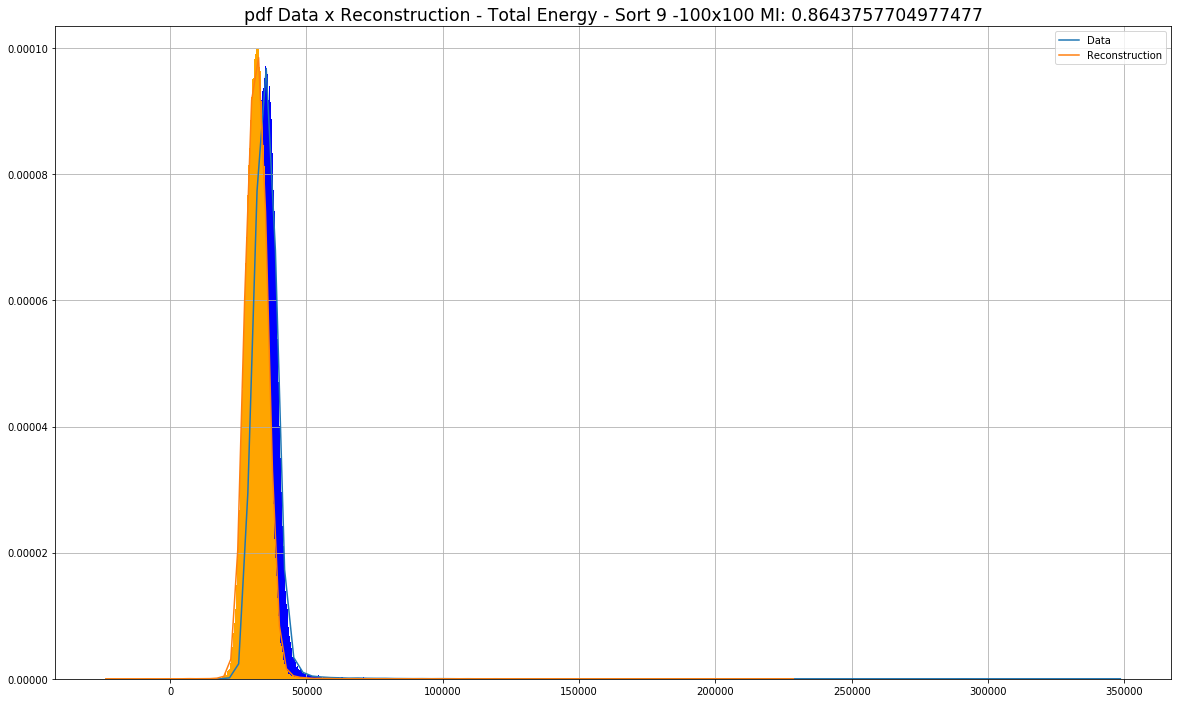

In [39]:
fig, ax1 = plt.subplots(figsize=(20, 12))

sb.kdeplot(beforenorm_val_Data.sum(axis=1).T,label="Data")
sb.kdeplot(unnorm_reconstruct_val_Data.sum(axis=1).T,label="Reconstruction")
#sb.grid()
plt.grid()
nbins = len(np.histogram(beforenorm_val_Data.sum(axis=1).T,'fd')[0])
plt.hist(beforenorm_val_Data.sum(axis=1).T, bins=nbins, normed=True,color='blue')
nbins = len(np.histogram(unnorm_reconstruct_val_Data.sum(axis=1).T,'fd')[0])
plt.hist(unnorm_reconstruct_val_Data.sum(axis=1).T, bins=nbins, normed=True,color='orange')
plt.title('pdf Data x Reconstruction - Total Energy - Sort '+str(nsort)+' -100x'+str(layer)+' MI: '+str(pdf),fontsize= 'xx-large')
#fig.savefig(dirout+'pdf_data_recons_tot_100x'+str(layer)+'sort'+str(nsort)+'.png')
plt.show()
fig.clear()


In [197]:
beforenorm_val_Data[:,0:7,].sum(axis=1).T.shape
#beforenorm_val_Data[0][100]#.shape
#        a[:,1:3,].sum(axis=1)

(339521,)

In [172]:
#signal and background

kl_et ={}
kl_reconstruction={}
neurons=[]
all_kl=[]
kl_mean=[]
kl_std=[]

kl_signal_mean=[]
kl_signal_std=[]

kl_bkg_mean=[]
kl_bkg_std=[]

#layers = sorted([int(f.split('x')[1]) for f in reconstruct.keys()])

layers = sorted(reconstruct.keys())

for layer in layers:
    kl_sort={}
    kl_signal_sort={}
    kl_bkg_sort={}
    neurons.append(layer)
    for nsort in reconstruct[layer].keys():
        if isinstance(reconstruct[layer][nsort], (tuple, list,)):
            unnorm_reconstruct = []
            for i, cdata in enumerate(reconstruct[layer][nsort]):
                unnorm_reconstruct.append( cdata * norms[nsort][i])
            
            unnorm_reconstruct_val_Data = np.concatenate( unnorm_reconstruct, axis=0 )
            beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )
            #pdf,bins = KLDiv(beforenorm_val_Data.T,unnorm_reconstruct_val_Data.T)
            ###Total Energy
            #pdf,bins = KLDiv(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            beforenorm_val_Data.sum(axis=1).T
            
            pdf_signal,bins_sgn = KLDiv(beforenorm[nsort][0].sum(axis=1).T,unnorm_reconstruct[0].sum(axis=1).T)
            pdf_bkg,bins_bkg = KLDiv(beforenorm[nsort][1].sum(axis=1).T,unnorm_reconstruct[1].sum(axis=1).T)
            
            kl_sort[nsort] = pdf
            kl_signal_sort[nsort] = pdf_signal
            kl_bkg_sort[nsort] = pdf_bkg
            
            ###do it for signal and background separated as well
    
    kl_mean.append(np.mean(kl_sort.values()))
    kl_std.append(np.std(kl_sort.values()))
    
    kl_signal_mean.append(np.mean(kl_signal_sort.values()))
    kl_signal_std.append(np.std(kl_signal_sort.values()))
    
    kl_bkg_mean.append(np.mean(kl_bkg_sort.values()))
    kl_bkg_std.append(np.std(kl_bkg_sort.values())) 
    
    kl_reconstruction[layer] = kl_sort
            

In [227]:
from scipy.stats import chi2_contingency

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi

In [171]:
#import copy
#kl_reconstruction_sum = copy.deepcopy(kl_reconstruction)
beforenorm_val_Data.sum(axis=1).shape

(339521,)

In [176]:
qqq = beforenorm_val_Data.sum(axis=1).T/unnorm_reconstruct_val_Data.sum(axis=1).T
qqq.shape

(339521,)

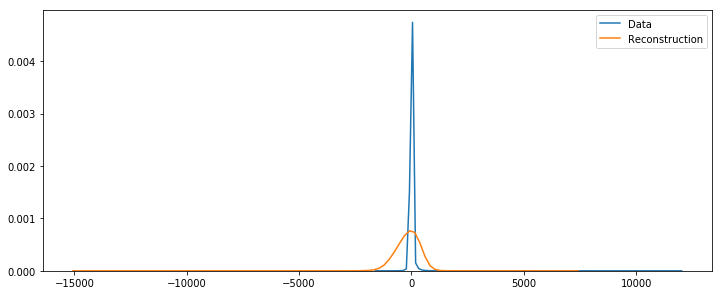

In [31]:
#neurons,kl_EM2
#kl_HAD3_sort
#mi(beforenorm_val_Data[:,96:99,].sum(axis=1).T,unnorm_reconstruct_val_Data[:,96:99,].sum(axis=1).T)



In [20]:
kl_tot

[0.90937841527739582,
 0.87841596176881853,
 0.82096219664525416,
 0.88083417643056161,
 0.81622053283694207,
 0.86935069058007275,
 0.73388220814283767,
 0.75768422626966303,
 0.74189269990200368,
 0.7277317211227492,
 0.70536242931821547,
 0.6918731685454419,
 0.68331281369847618,
 0.65676878475763711,
 0.64657828102395809,
 0.65714527778808729,
 0.65708841536415197,
 0.71021334108894862,
 0.64402588000605898]

In [89]:
#(0.43224+0.5516+0.8459+0.4133+0.7710+0.7135+0.5576+0.6143+0.85+0.4579)/10
neurons

[90, 3, 10, 25, 40, 55, 70, 85, 90, 100]

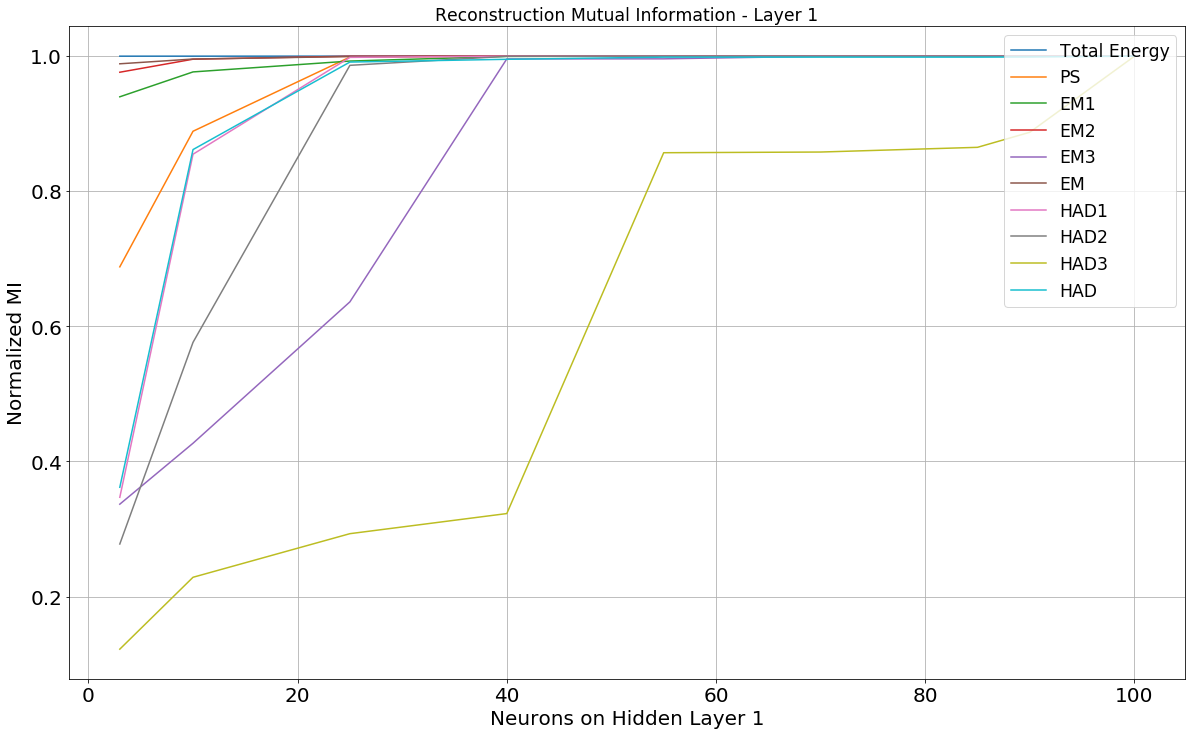

In [98]:
fig, ax1 = plt.subplots(figsize=(20, 12))

#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
plt.plot(neurons,kl_tot)
plt.plot(neurons,kl_PS)
plt.plot(neurons,kl_EM1)
plt.plot(neurons,kl_EM2)
plt.plot(neurons,kl_EM3)
plt.plot(neurons,kl_EM)
plt.plot(neurons,kl_HAD1)
plt.plot(neurons,kl_HAD2)
plt.plot(neurons,kl_HAD3)
plt.plot(neurons,kl_HAD)
#ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)

#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')

#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'reconstruction_mutual_info_comparsion2.png')
#fig.savefig(dirout+'reconstruction.png')

In [197]:
kl_HAD3,neurons

([0.087360609202718403,
  0.12211867155982543,
  0.15537916563022638,
  0.16144680551358387,
  0.22851527140836242,
  0.2178683328330287,
  0.31026525494159424,
  0.29305457575060856,
  0.32282625785232122,
  0.85817215856966056,
  0.85797532921998465,
  0.86494177900154501,
  0.88721371438002827,
  0.99967558344222207],
 [2, 3, 4, 5, 10, 15, 20, 25, 40, 55, 70, 85, 90, 100])

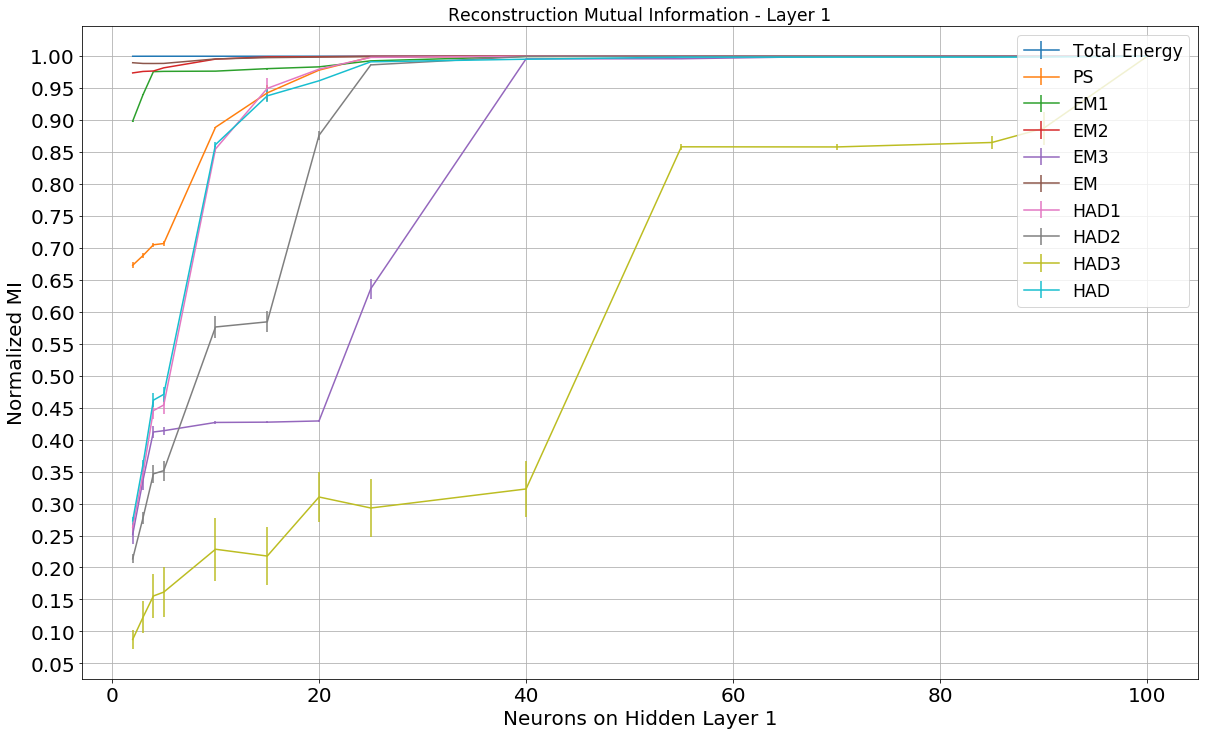

In [198]:
fig, ax1 = plt.subplots(figsize=(20, 12))

#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)
ax1.errorbar(neurons, y=kl_PS, yerr=kl_PS_std)
ax1.errorbar(neurons, y=kl_EM1, yerr=kl_EM1_std)
ax1.errorbar(neurons, y=kl_EM2, yerr=kl_EM2_std)
ax1.errorbar(neurons, y=kl_EM3, yerr=kl_EM3_std)
ax1.errorbar(neurons, y=kl_EM, yerr=kl_EM_std)
ax1.errorbar(neurons, y=kl_HAD1, yerr=kl_HAD1_std)
ax1.errorbar(neurons, y=kl_HAD2, yerr=kl_HAD2_std)
ax1.errorbar(neurons, y=kl_HAD3, yerr=kl_HAD3_std)
ax1.errorbar(neurons, y=kl_HAD, yerr=kl_HAD_std)


#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc=1,fontsize = 'xx-large')

#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
#fig.savefig(dirout+'reconstruction_mutual_info_comparsion2.png')
#fig.savefig(dirout+'reconstruction.png')

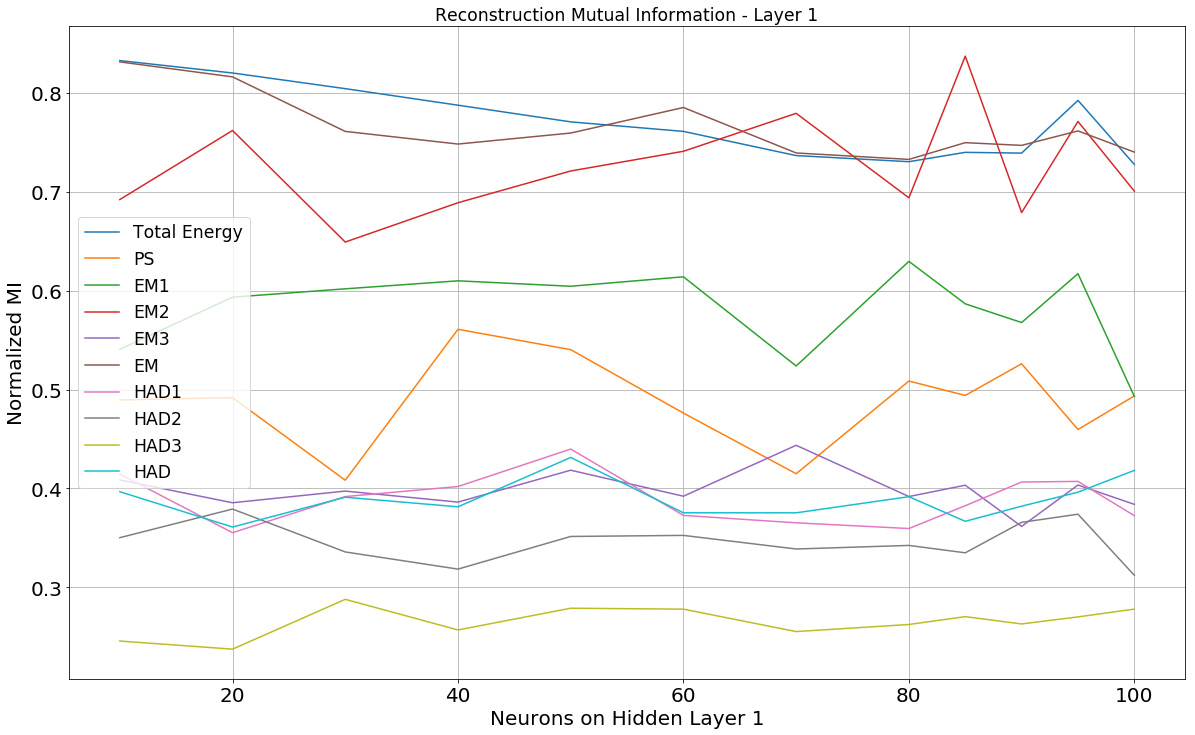

In [243]:
fig, ax1 = plt.subplots(figsize=(20, 12))

#ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)

#plt.plot(neurons,kl_mean)
plt.plot(neurons,kl_tot)
plt.plot(neurons,kl_PS)
plt.plot(neurons,kl_EM1)
plt.plot(neurons,kl_EM2)
plt.plot(neurons,kl_EM3)
plt.plot(neurons,kl_EM)
plt.plot(neurons,kl_HAD1)
plt.plot(neurons,kl_HAD2)
plt.plot(neurons,kl_HAD3)
plt.plot(neurons,kl_HAD)

#plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
ax1.set_ylabel('Normalized MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
ax1.legend(['Total Energy','PS','EM1','EM2','EM3','EM','HAD1','HAD2','HAD3','HAD'], loc='best',fontsize = 'xx-large')

#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_mutual_info_comparsion.png')
#fig.savefig(dirout+'reconstruction.png')

# Sum of all Rings

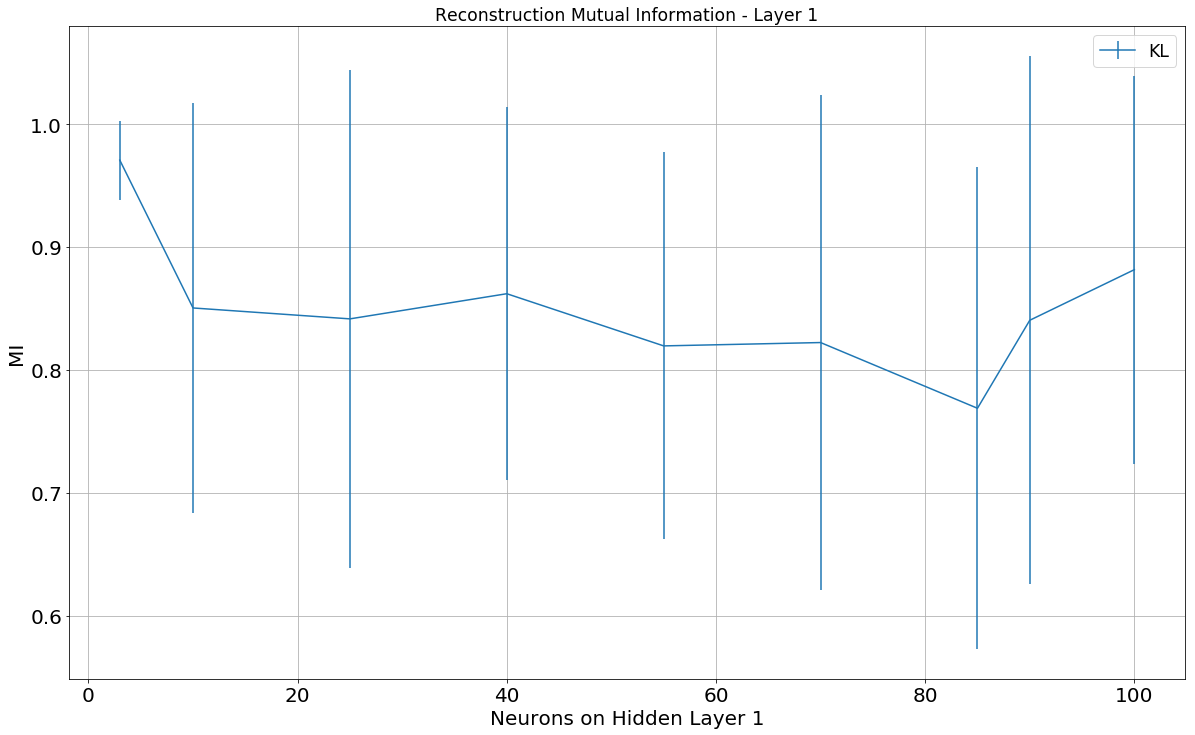

In [93]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Reconstruction Mutual Information - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('MI',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_mi.png')
#fig.savefig(dirout+'reconstruction.png')

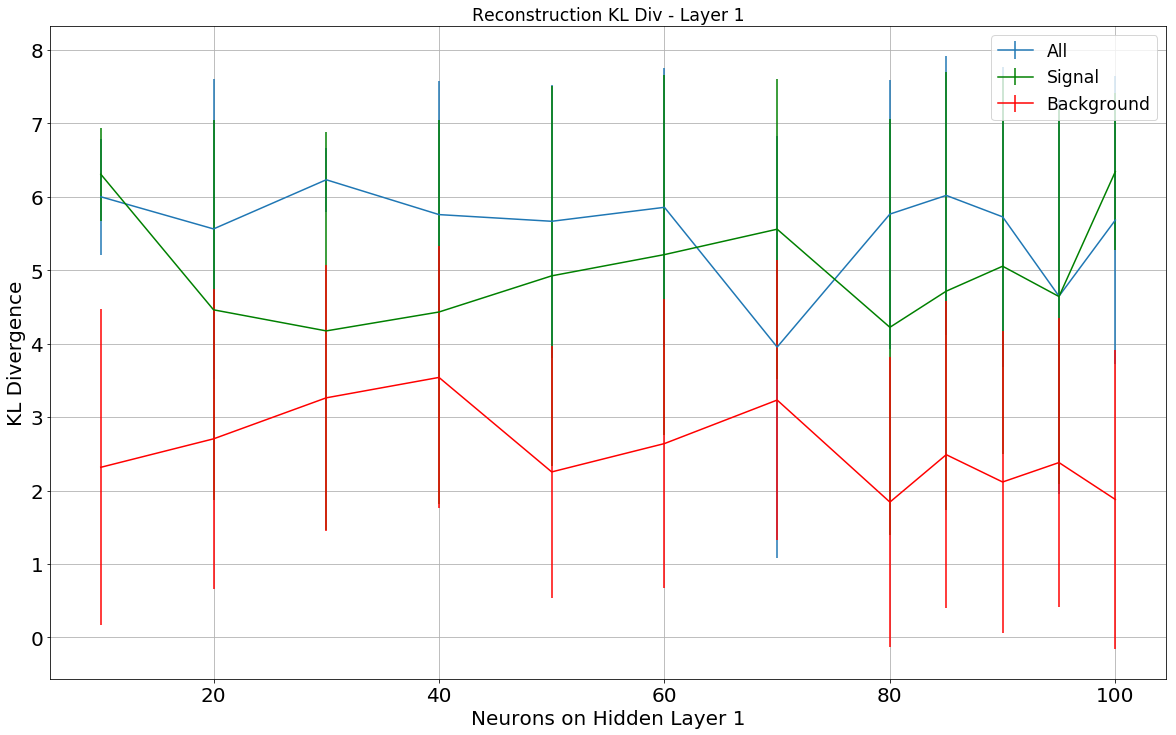

In [165]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)
ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_sgn_bkg.png')

# Total Energy

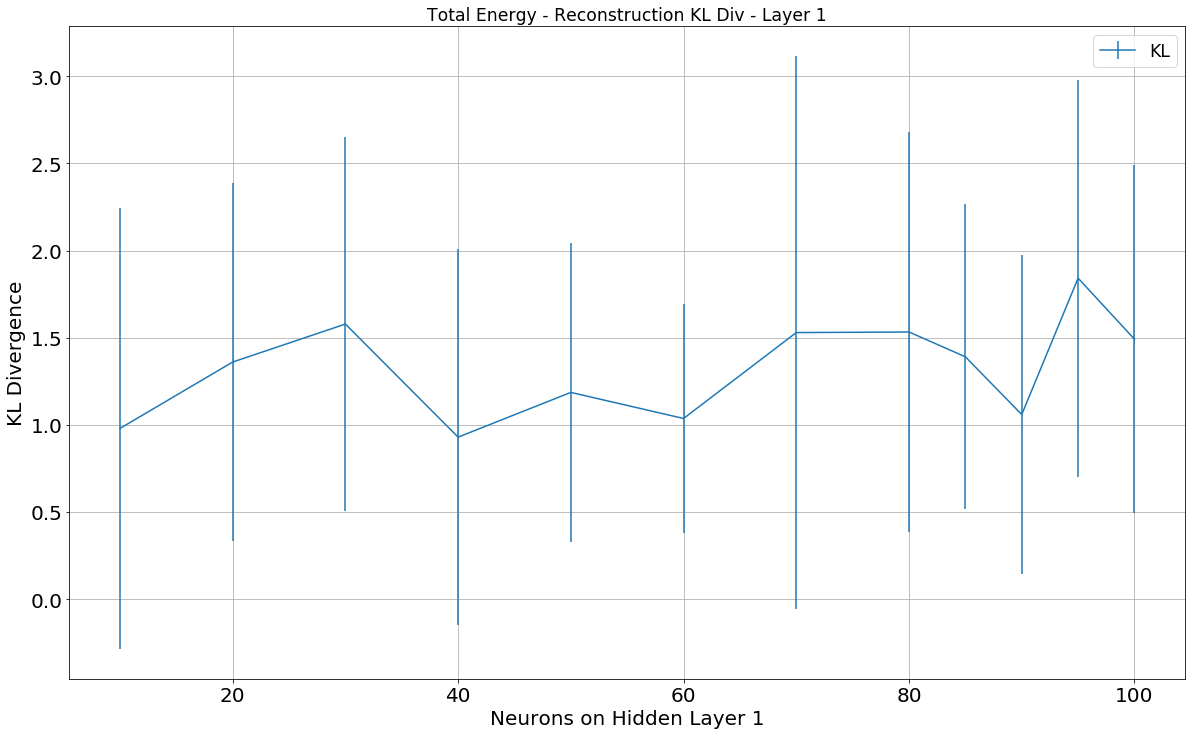

In [213]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_tot, yerr=kl_tot_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Total Energy - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_totalenergy.png')
#fig.savefig(dirout+'reconstruction.png')

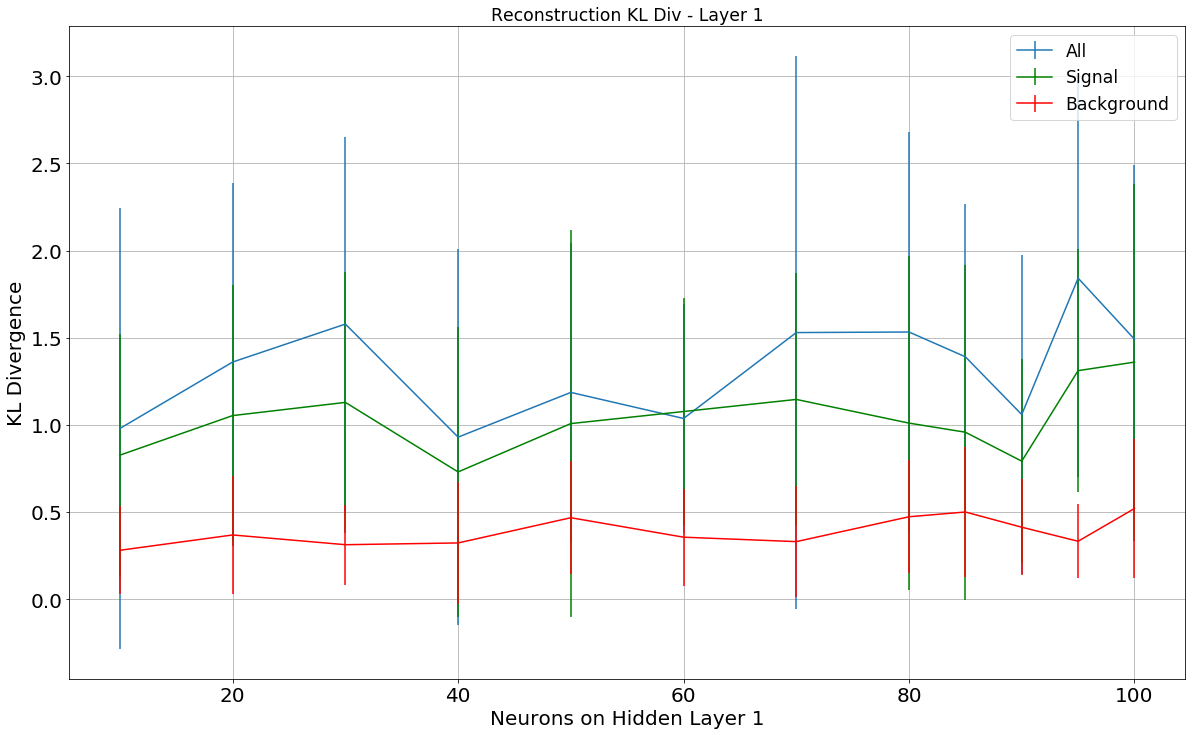

In [174]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_mean, yerr=kl_std)
ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
#ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_sgn_bkg_totalenergy.png')

# EM

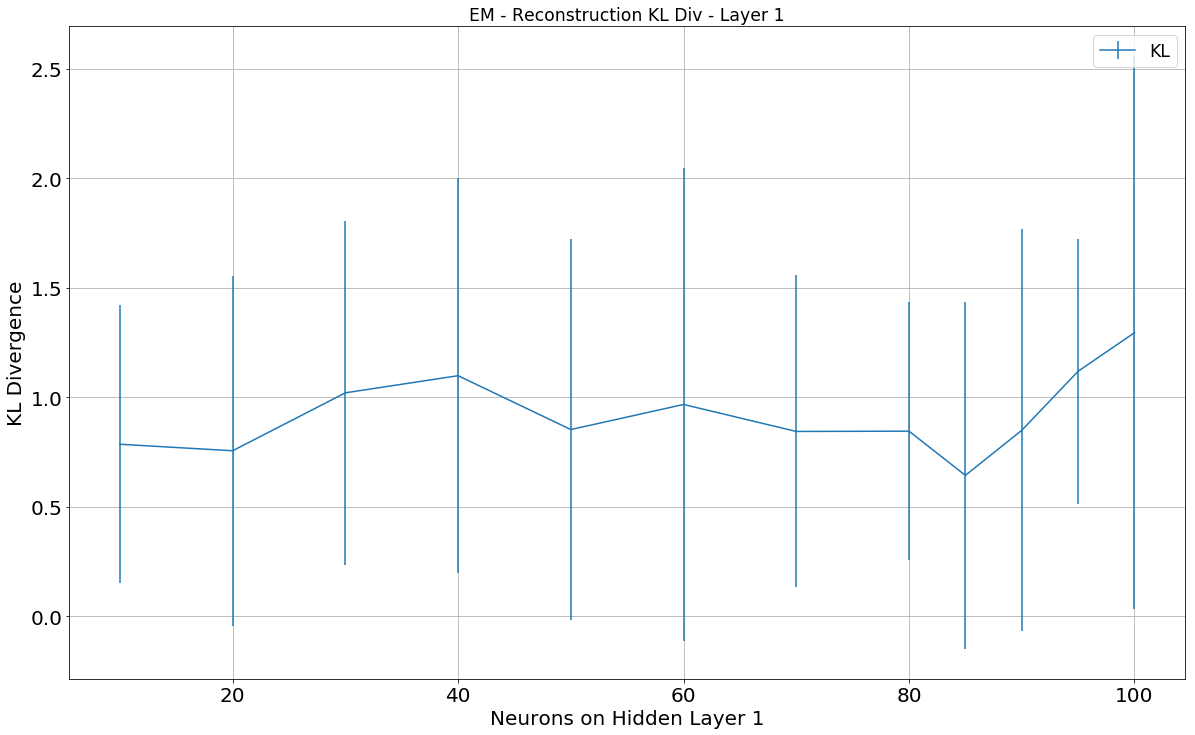

In [214]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM, yerr=kl_EM_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em.png')
#fig.savefig(dirout+'reconstruction.png')

# PS

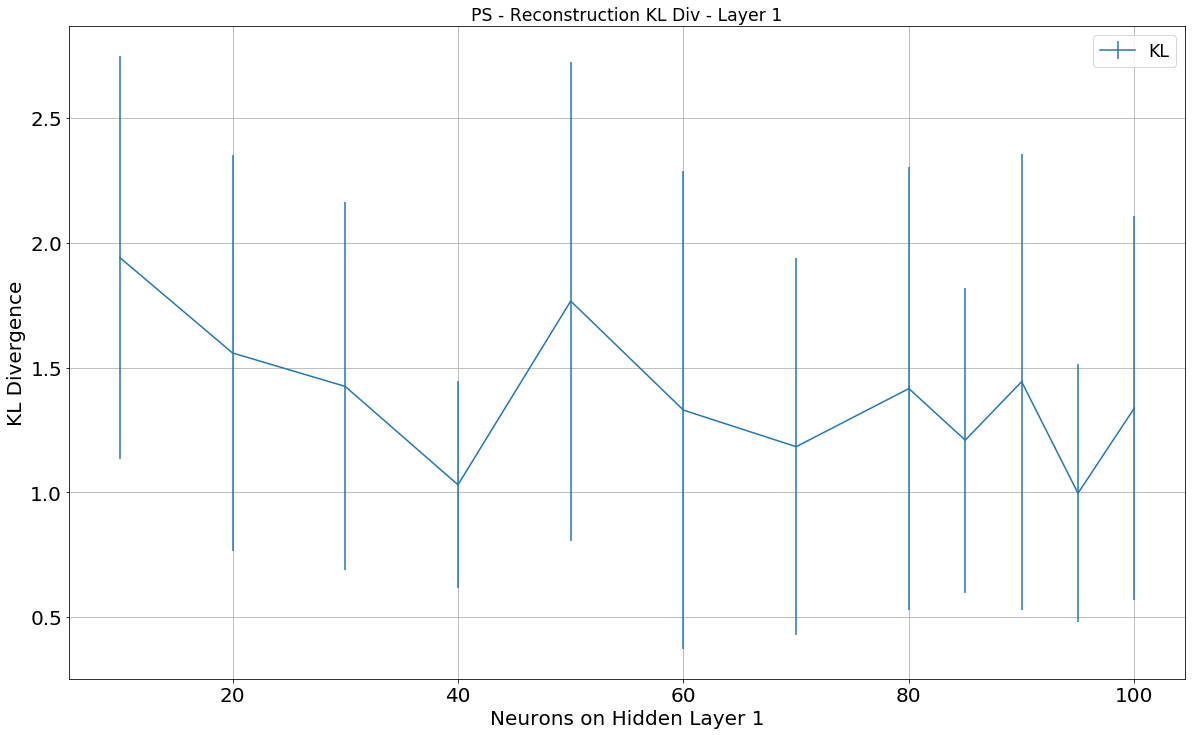

In [215]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_PS, yerr=kl_PS_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('PS - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_ps.png')
#fig.savefig(dirout+'reconstruction.png')

# EM1

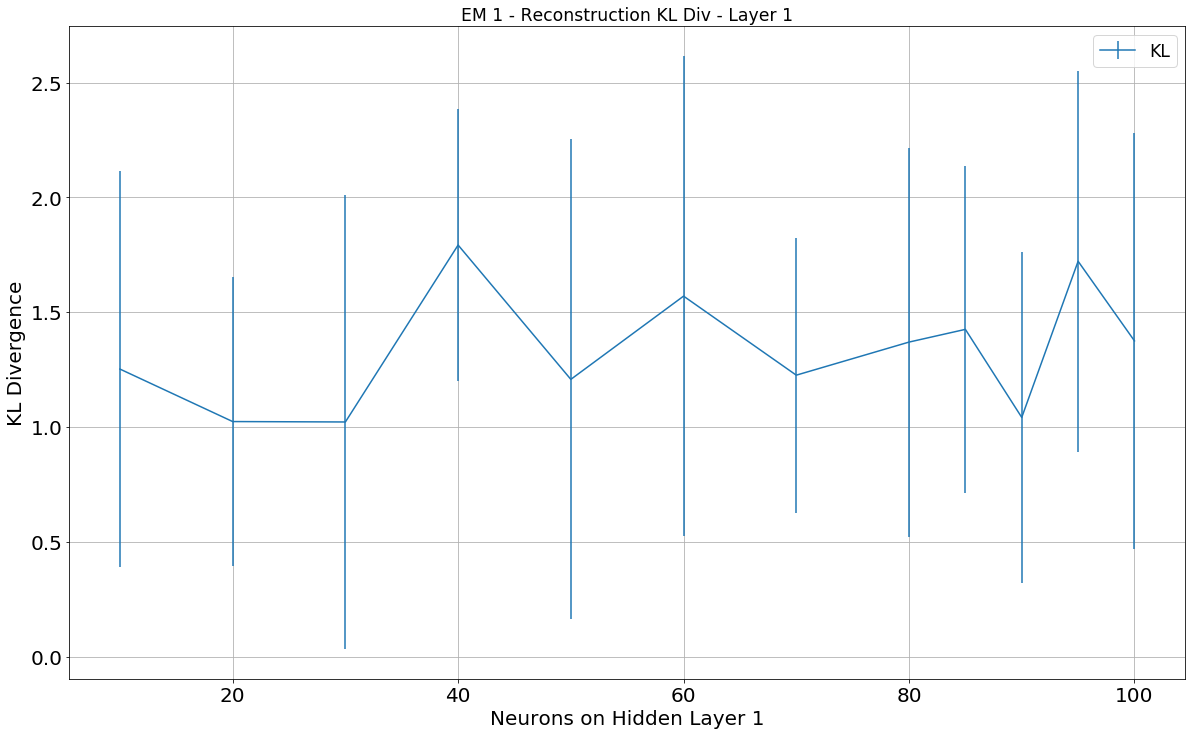

In [216]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM1, yerr=kl_EM1_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM 1 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em1.png')
#fig.savefig(dirout+'reconstruction.png')

# EM2

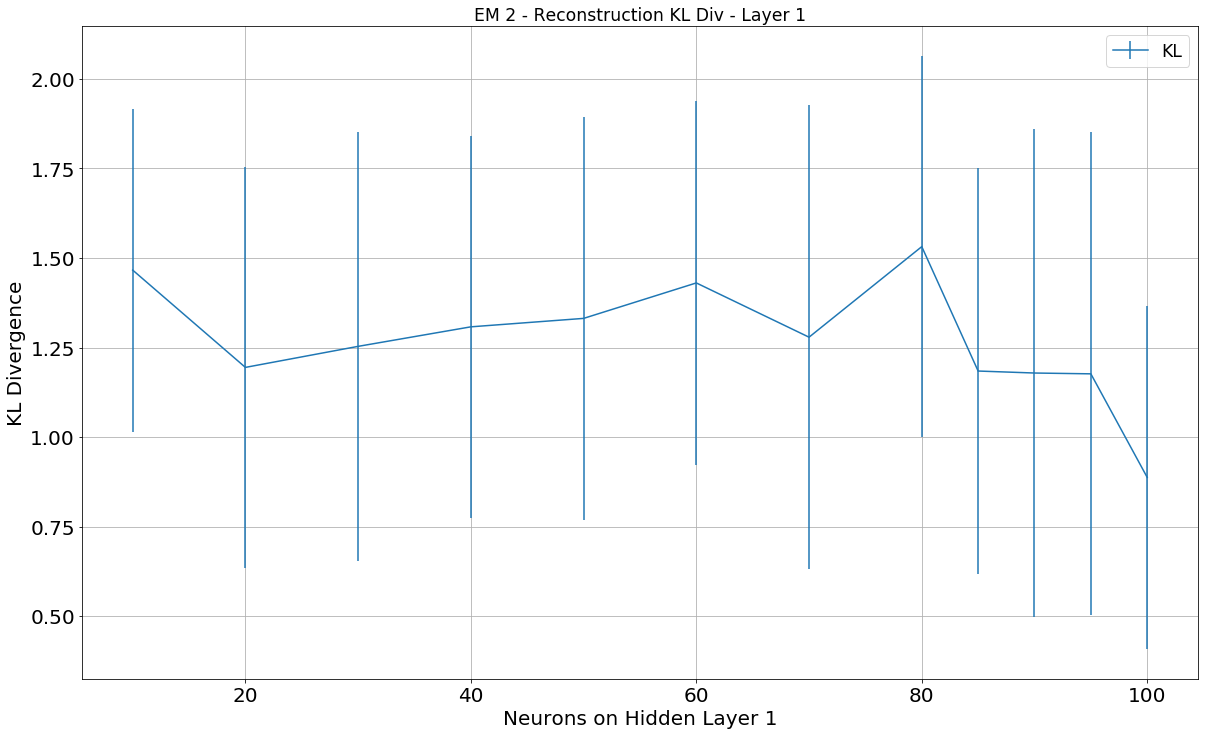

In [217]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM2, yerr=kl_EM2_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM 2 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em2.png')
#fig.savefig(dirout+'reconstruction.png')

# EM3

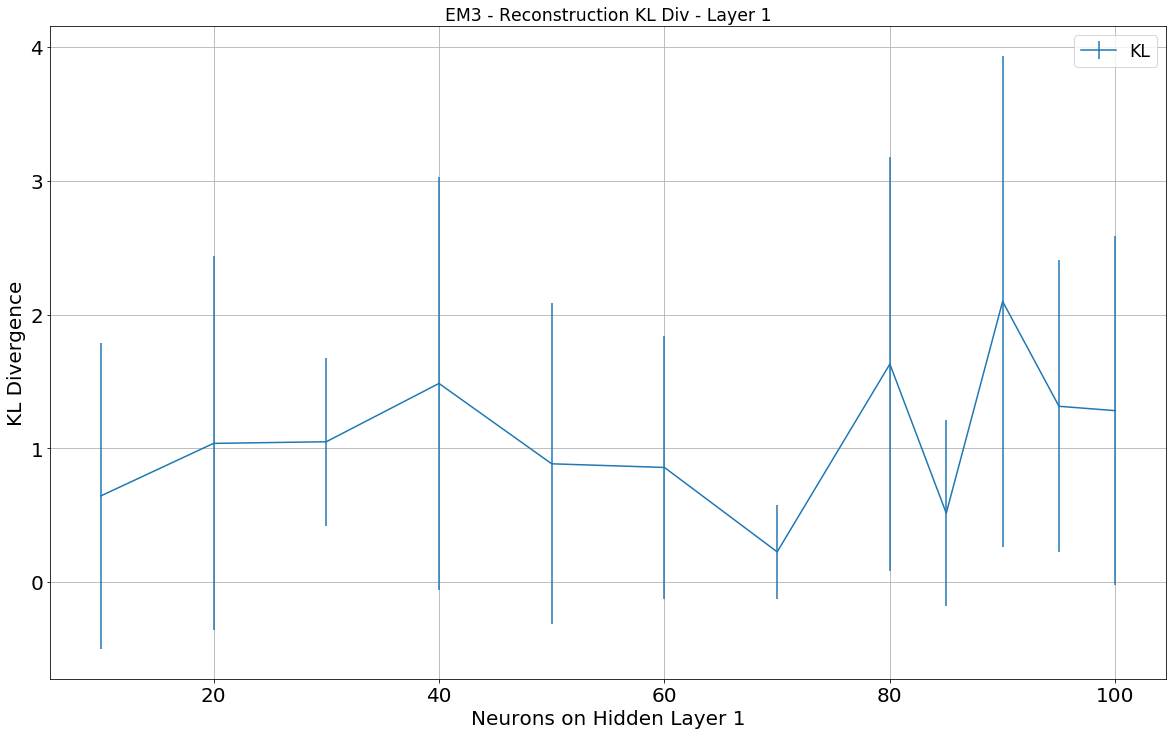

In [218]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_EM3, yerr=kl_EM3_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('EM3 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_em3.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD

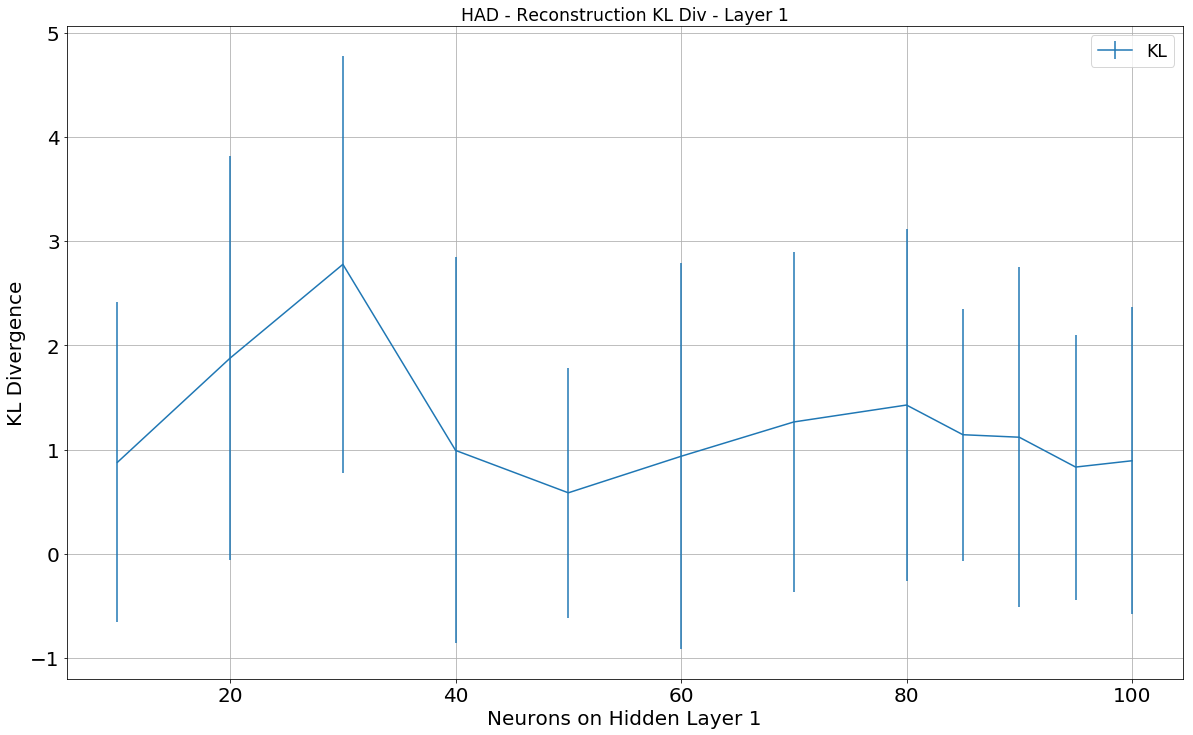

In [219]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD, yerr=kl_HAD_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD1

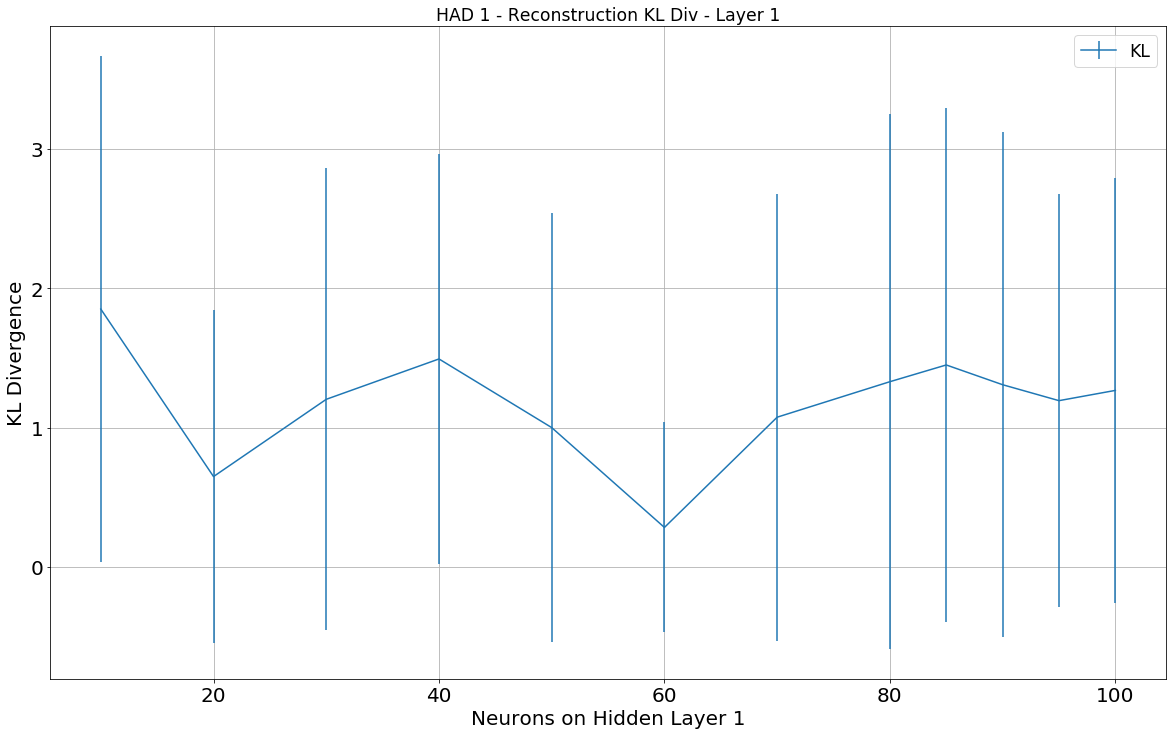

In [220]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD1, yerr=kl_HAD1_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD 1 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had1.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD2

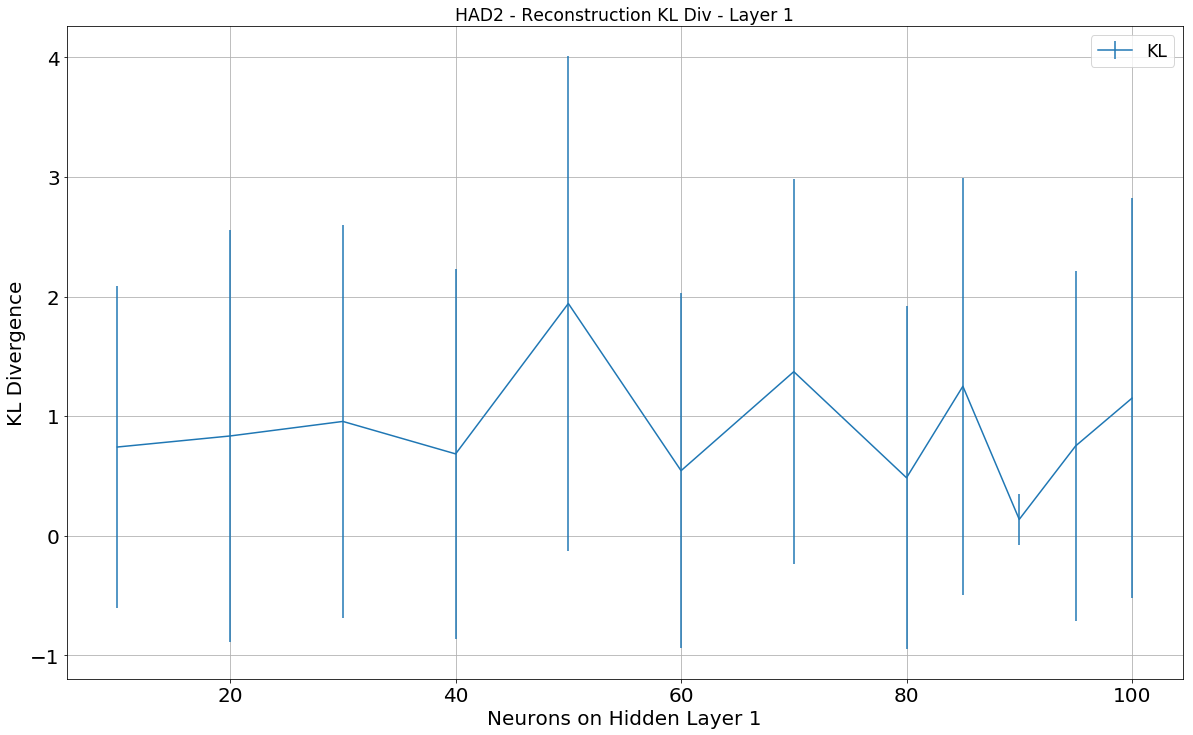

In [221]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD2, yerr=kl_HAD2_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD2 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had2.png')
#fig.savefig(dirout+'reconstruction.png')

# HAD3

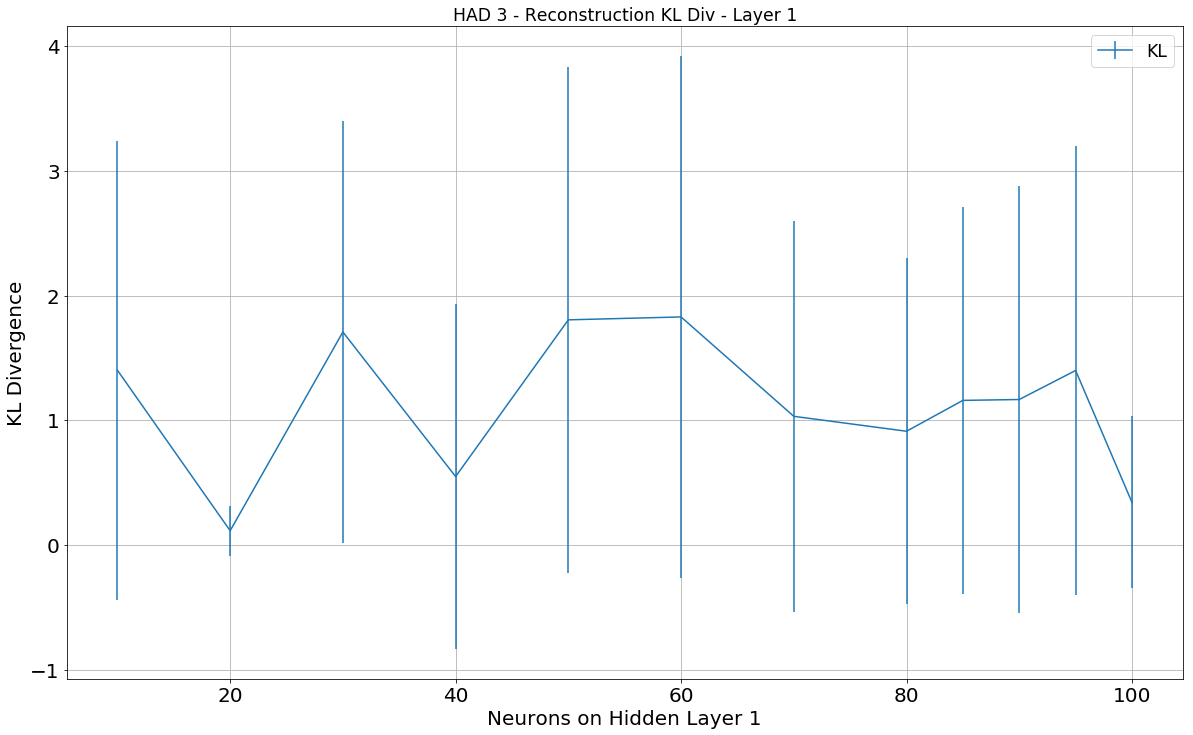

In [222]:
fig, ax1 = plt.subplots(figsize=(20, 12))
#fig = plt.figure(figsize=(20, 12))
#ax2 = ax1.twinx()
##ax1.errorbar(neurons, y=mse, yerr=std_mse,color='g')
ax1.errorbar(neurons, y=kl_HAD3, yerr=kl_HAD3_std)
#ax1.errorbar(neurons, y=kl_signal_mean, yerr=kl_signal_std,color='g')
#ax1.errorbar(neurons, y=kl_bkg_mean, yerr=kl_bkg_std,color='r')
#ax2.set_ylabel('sin')

#plt.plot(neurons,kl_mean)
plt.title('HAD 3 - Reconstruction KL Div - Layer 1',fontsize= 'xx-large')
#ax1.set_ylabel('MSE Reconstruction',fontsize=20)
ax1.set_ylabel('KL Divergence',fontsize=20)
ax1.set_xlabel('Neurons on Hidden Layer 1',fontsize=20)
ax1.tick_params(axis='both',labelsize=20)
#ax2.tick_params(axis='both',labelsize=20)
#ax2.plot(neurons,ref_pf,'r--')
#ax1.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
ax1.legend(['KL'], loc=1,fontsize = 'xx-large')
axes = plt.gca()
#ylim = axes.get_ylim()

import matplotlib.ticker as ticker
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.grid()
#axes.set_ylim(ylim)
#plt.savefig(dirout+'40X20_kl_recons_anel.png')
plt.show()
fig.savefig(dirout+'reconstruction_l1_had3.png')
#fig.savefig(dirout+'reconstruction.png')

In [127]:
beforenorm_val_Data = np.concatenate( beforenorm[nsort], axis=0 )

In [98]:
ass={}
ass[0]=2
ass[1]=3
ass[2]=6
ass[3]=9


In [104]:
#ass.values()
np.std(ass.values())

2.7386127875258306

In [90]:
unnorm_data[0][0]

array([ 8.39646240e+02,  1.06269421e+03,  3.20057602e+01,  9.14693832e-01,
        1.12175446e+02,  6.04448738e+01, -8.95127182e+01,  1.29294037e+02,
        2.08520483e+03,  6.93827490e+03,  1.51836560e+03,  8.32027710e+02,
        4.57789825e+02,  4.14541351e+02,  1.42549622e+02,  8.10741806e+01,
        1.73349953e+00, -3.52947006e+01, -5.96776733e+01,  8.96027222e+01,
        5.86165314e+01,  2.09794846e+01, -3.42154007e+01, -2.98789203e-01,
        5.11646652e+01,  1.21556807e+01,  4.24896584e+01,  2.80395641e+01,
        3.48431702e+01, -3.64512849e+00, -5.49335938e+01, -8.10185432e+00,
       -3.08214188e+01, -2.47685885e+00, -7.12998886e+01, -7.45881557e+00,
       -5.51200447e+01, -3.08013153e+01,  1.72903118e+01, -5.77918282e+01,
        3.45475745e+00, -2.39603543e+00, -2.65236912e+01,  2.45904541e+00,
       -7.73752136e+01, -1.88949347e+00,  3.37837219e+01, -5.08867645e+01,
        6.43538361e+01, -1.33176384e+01, -1.35315933e+02, -4.53872728e+00,
        3.25193367e+01,  

In [85]:
afternorm[0][0]

array([[ 2.2333767e-02,  2.8266624e-02,  8.5132185e-04, ...,
         2.2517118e-04, -4.7686187e-04,  0.0000000e+00],
       [ 2.5891216e-02,  8.3414381e-03, -3.0658904e-03, ...,
         1.3497335e-04, -2.4407177e-04,  0.0000000e+00],
       [ 1.8975632e-02,  3.2899857e-02,  6.9864346e-03, ...,
        -4.3124289e-04, -2.9044608e-05,  0.0000000e+00],
       ...,
       [ 2.2504025e-03,  3.1683140e-03,  2.6146527e-03, ...,
         1.8720915e-04,  1.1490405e-03,  0.0000000e+00],
       [ 2.9191202e-02,  3.4138426e-02, -1.2338232e-02, ...,
         9.1451098e-04, -3.8869379e-04,  0.0000000e+00],
       [ 1.3924519e-02, -2.8772824e-03,  1.7598603e-02, ...,
         1.2681755e-03, -1.9081774e-04,  0.0000000e+00]], dtype=float32)

In [61]:
saaa = 'tunedDiscr.pp-N1-AE_77.hn0010.s0003.il0000.iu0099.et0002.eta0000.pic'
print saaa.split('.')[3][-1]

3


In [222]:
if isinstance(beforenorm, (tuple, list,)):
      norm_data = []
      for i, cdata in enumerate(beforenorm):
        norm_data.append( cdata / norms[i])

In [237]:
if isinstance(afternorm, (tuple, list,)):
      unnorm_data = []
      for i, cdata in enumerate(afternorm):
        unnorm_data.append( cdata * norms[i])

In [ ]:
if isinstance(data, (tuple, list,)):
    #norm1_val_Data = np.concatenate( data, axis=0 )
    norm1_val_Data = np.concatenate( data, axis=0 )

In [243]:
unnorm_data[1][43]

array([ 4.14324524e+02,  5.80920563e+01,  2.90117615e+02, -3.82144836e+02,
       -3.07323822e+02,  1.47303711e+02, -1.26472496e+02,  1.27288582e+02,
        2.27023071e+03,  3.56478882e+03,  9.86738037e+02,  4.83409485e+02,
        1.14288086e+02,  6.55897369e+01,  7.04929428e+01, -2.07344189e+01,
        8.46368942e+01, -1.56415987e+01, -5.55555191e+01,  3.46798325e+01,
       -3.04336834e+01, -3.92068291e+00,  4.15888824e+01, -4.29359665e+01,
        9.31302261e+01,  1.36893091e+01,  2.44227619e+01, -5.81115150e+01,
       -7.88156052e+01,  5.04332542e+01,  1.59602060e+01, -9.38887882e+00,
       -3.06666241e+01, -6.20635185e+01,  1.91980529e+00, -5.17838554e+01,
        3.16268997e+01, -1.08848457e+01, -7.75930786e+01, -1.16034327e+01,
        9.62844193e-02, -2.99665508e+01, -2.22139091e+01, -4.39717979e+01,
       -3.39476180e+00, -1.71876450e+01,  1.32685280e+01, -2.33074245e+01,
       -5.61474711e-02, -5.79938278e+01, -4.29106407e+01, -2.08246975e+01,
       -5.40919638e+00, -

In [242]:
beforenorm[1][43]

array([ 4.14324524e+02,  5.80920563e+01,  2.90117615e+02, -3.82144836e+02,
       -3.07323822e+02,  1.47303711e+02, -1.26472496e+02,  1.27288582e+02,
        2.27023071e+03,  3.56478882e+03,  9.86738037e+02,  4.83409485e+02,
        1.14288086e+02,  6.55897369e+01,  7.04929428e+01, -2.07344189e+01,
        8.46368942e+01, -1.56415987e+01, -5.55555191e+01,  3.46798325e+01,
       -3.04336853e+01, -3.92068315e+00,  4.15888824e+01, -4.29359665e+01,
        9.31302261e+01,  1.36893091e+01,  2.44227619e+01, -5.81115150e+01,
       -7.88156052e+01,  5.04332542e+01,  1.59602060e+01, -9.38887882e+00,
       -3.06666241e+01, -6.20635185e+01,  1.91980529e+00, -5.17838516e+01,
        3.16268997e+01, -1.08848457e+01, -7.75930786e+01, -1.16034327e+01,
        9.62844193e-02, -2.99665527e+01, -2.22139091e+01, -4.39717979e+01,
       -3.39476156e+00, -1.71876450e+01,  1.32685280e+01, -2.33074245e+01,
       -5.61474748e-02, -5.79938278e+01, -4.29106407e+01, -2.08246975e+01,
       -5.40919638e+00, -

In [215]:
len(norms[0])+len(norms[1])

339519

In [208]:
if isinstance(data, (tuple, list,)):
    #norm1_val_Data = np.concatenate( data, axis=0 )
    norm1_val_Data = np.concatenate( data, axis=0 )

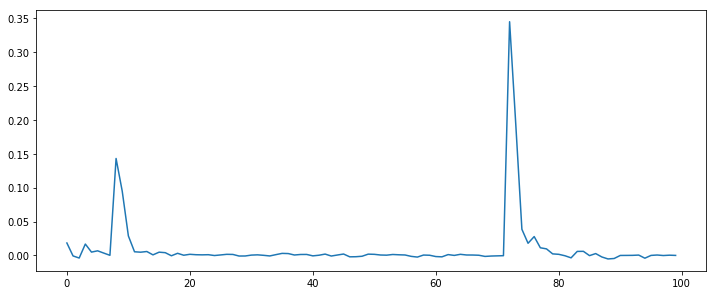

In [131]:
norm1_val_Data[1]
plt.plot(norm1_val_Data[1])

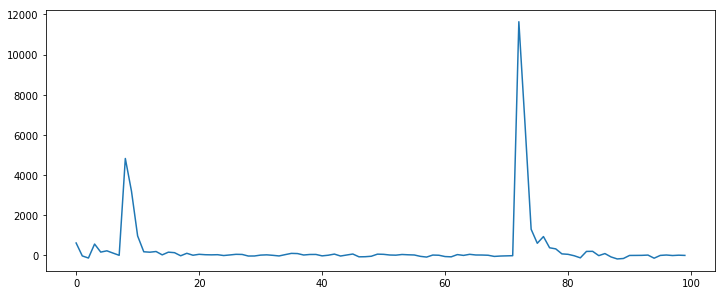

In [130]:
val_Data[1]
plt.plot(val_Data[1])
#before_val_Data87[-43]

In [113]:
for i in range(before_val_Data87.shape[1]):
    pdf, a = EstPDF(before_val_Data87.T[i],mode='hist')
    plt.plot(pdf)
    plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Energia do Anel',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.grid()
    plt.savefig(dirout+'pdf_norm1'+str(i+1)+'.png')
    plt.gcf().clear()
#plt.savefig(dirout+'60X40_kl_recons_anel.png')

In [99]:
data[0].T.shape
data[1].T.shape


(100, 2900)

In [145]:
for i in range(norm1_val_Data.shape[1]):
    pdf, a = EstPDF(norm1_val_Data.T[i],mode='hist')
    plt.plot(pdf)
    pdf, a = EstPDF(data[0].T[i],mode='hist')
    plt.plot(pdf)
    pdf, a = EstPDF(data[1].T[i],mode='hist')
    plt.plot(pdf)
    plt.legend(['All','Signal','Background'], loc='best',fontsize = 'xx-large')
    plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
    plt.ylabel('Probabilidade',fontsize= 'xx-large')
    plt.xlabel('Energia do Anel',fontsize= 'xx-large')
    plt.tick_params(axis='both',labelsize=16)
    plt.grid()
    plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
    plt.gcf().clear()


Anel: 1
OK Anel: 1
Anel: 2
OK Anel: 2
Anel: 3
OK Anel: 3
Anel: 4
OK Anel: 4
Anel: 5
OK Anel: 5
Anel: 6
OK Anel: 6
Anel: 7
OK Anel: 7
Anel: 8
OK Anel: 8
Anel: 9
OK Anel: 9
Anel: 10
OK Anel: 10
Anel: 11
OK Anel: 11
Anel: 12
OK Anel: 12
Anel: 13
OK Anel: 13
Anel: 14
OK Anel: 14
Anel: 15
OK Anel: 15
Anel: 16
OK Anel: 16
Anel: 17
OK Anel: 17
Anel: 18
OK Anel: 18
Anel: 19
OK Anel: 19
Anel: 20
OK Anel: 20
Anel: 21
OK Anel: 21
Anel: 22
OK Anel: 22
Anel: 23
OK Anel: 23
Anel: 24
OK Anel: 24
Anel: 25
OK Anel: 25
Anel: 26
OK Anel: 26
Anel: 27
OK Anel: 27
Anel: 28
OK Anel: 28
Anel: 29
OK Anel: 29
Anel: 30
OK Anel: 30
Anel: 31
OK Anel: 31
Anel: 32
OK Anel: 32
Anel: 33
OK Anel: 33
Anel: 34
OK Anel: 34
Anel: 35
OK Anel: 35
Anel: 36
OK Anel: 36
Anel: 37
OK Anel: 37
Anel: 38
OK Anel: 38
Anel: 39
OK Anel: 39
Anel: 40
OK Anel: 40
Anel: 41
OK Anel: 41
Anel: 42
OK Anel: 42
Anel: 43
OK Anel: 43
Anel: 44
OK Anel: 44
Anel: 45
OK Anel: 45
Anel: 46
OK Anel: 46
Anel: 47
OK Anel: 47
Anel: 48
OK Anel: 48
Anel: 49
O

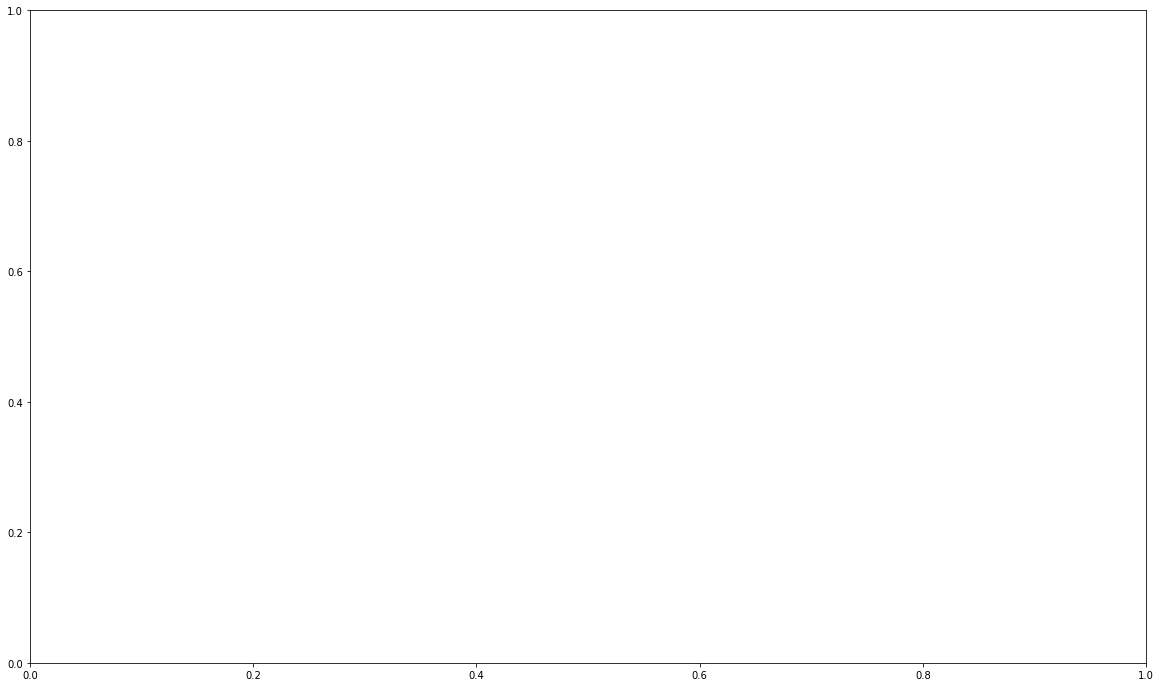

In [209]:
fig1 = plt.figure(figsize=(20, 12))
for i in range(norm1_val_Data.shape[1]):
    print 'Anel: '+str(i+1)
    try:
        print 'OK Anel: '+str(i+1)
        #fig1 = plt.figure(figsize=(20, 12))
        #i=0
        #pdf, a = EstPDF(norm1_val_Data.T[i],mode='hist')
        sb.kdeplot(norm1_val_Data.T[i],shade=True,label="All")
        #pdf, a = EstPDF(data[0].T[i],mode='hist')
        sb.kdeplot(data[0].T[i],label="Signal")
        #pdf, a = EstPDF(data[1].T[i],mode='hist')
        sb.kdeplot(data[1].T[i],label="Background")
        plt.legend(loc='best',fontsize = 'xx-large')
        plt.title('Pdf Anel '+str(i+1),fontsize= 'xx-large')
        plt.ylabel('Probabilidade',fontsize= 'xx-large')
        plt.xlabel('Energia do Anel',fontsize= 'xx-large')
        plt.tick_params(axis='both',labelsize=16)
        plt.grid()
        plt.savefig(dirout+'pdf_norm1_'+str(i+1)+'.png')
        plt.gcf().clear()
    except:
        print 'Erro Anel: '+str(i+1)


In [203]:
val_Data.shape[1]
#import sklearn
#sklearn.neighbors.KernelDensity(norm1_val_Data.T[1])

100

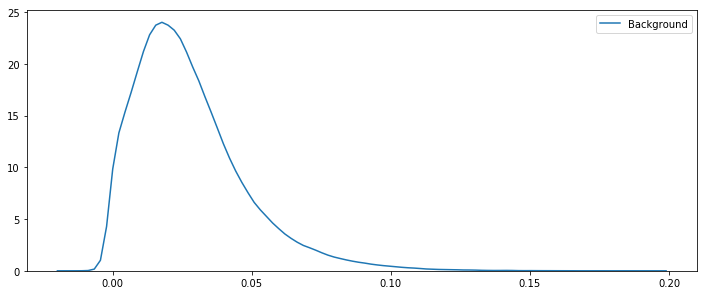

In [192]:
sb.kdeplot(data[0].T[0],label="Background")

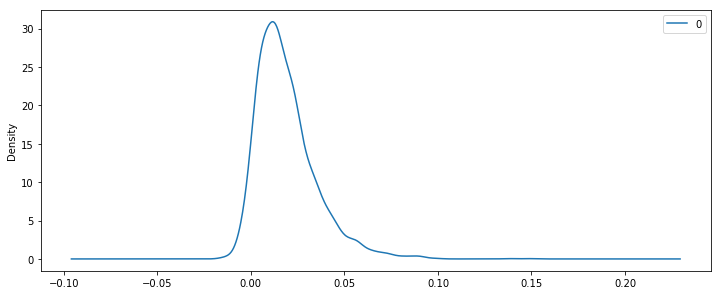

In [191]:
import pandas as pd
pd.DataFrame(data[1].T[1]).plot.kde()

In [11]:
import numpy as np
from sklearn.neighbors import KernelDensity

# Estimating PDF
def EstPDF(data, bins=np.array([-1,0, 1]), mode='kernel', kernel='epanechnikov', kernel_bw=0.01, verbose=False):
    # kernels = 'epanechnikov','gaussian', 'tophat','exponential', 'linear', 'cosine'
    if mode == 'hist':
        if verbose:
            print 'EstPDF: Histogram Mode'
        [y,pts] = np.histogram(data,bins=100,density=True)
        bins_centers = pts[0:-1]+np.diff(pts)
        pdf = y*np.diff(pts)
        return [pdf,bins_centers]
    if mode == 'kernel':
        if verbose:
            print 'EstPDF: Kernel Mode'
        if kernel is None:
            if verbose:
                print 'No kernel defined'
            return -1
        if kernel_bw is None:
            if verbose:
                print 'No kernel bandwidth defined'
            return -1
        kde = (KernelDensity(kernel=kernel,algorithm='auto',bandwidth=kernel_bw).fit(data))
        aux_bins = bins
        log_dens_x = (kde.score_samples(aux_bins[:, np.newaxis]))
        pdf = np.exp(log_dens_x)
        pdf = pdf/sum(pdf)
        bins_centers = bins
        return [pdf,bins_centers]

# Computing KL Divergence
def KLDiv(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    [p_pdf,p_bins] = EstPDF(p, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    [q_pdf,q_bins] = EstPDF(q, bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

# Computing KL Divergence
def KLDiv_conj(p, q, bins=np.array([-1,0, 1]), mode='hist', kernel='epanechnikov', kernel_bw=0.1, verbose=False):
    p_pdf_conj=1
    q_pdf_conj=1
    for i_anel in range(100): 
        [ppdf,p_bins] = EstPDF(p[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
        [qpdf,q_bins] = EstPDF(q[i_anel], bins=bins, mode=mode, kernel=kernel, kernel_bw=kernel_bw, verbose=verbose)
    
        p_pdf_conj = p_pdf_conj*ppdf
        q_pdf_conj = q_pdf_conj*qpdf
    
    p_pdf=p_pdf_conj
    q_pdf=q_pdf_conj
    
    #print len(p_pdf),len(q_pdf)
    kl_values = []
    for i in range(len(p_pdf)):
        if p_pdf[i] == 0 or q_pdf[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p_pdf[i]*np.log10(p_pdf[i]/q_pdf[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

In [86]:
pdf,bins = KLDiv(data0.T,val_Data.T)
print pdf

0.0


In [31]:
print data77.shape
print data87.shape
print data40.shape
print data10.shape

(339519, 100)
(339519, 100)
(339521, 100)
(339519, 100)


In [29]:
pdf

0.6241268774152477

In [52]:
import numpy as np

def entropy(counts):
    '''Compute entropy.'''
    ps = counts/float(np.sum(counts))  # coerce to float and normalize
    ps = ps[np.nonzero(ps)]            # toss out zeros
    H = -sum(ps * np.log2(ps))   # compute entropy
    #H = scipy.stats.entropy(ps,base=2)
    return H

def mi(x, y):
    '''Compute mutual information'''
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    counts_xy = np.histogram2d(x, y, bins=bins)[0]
    counts_x  = np.histogram(x, bins=bins)[0]
    counts_y  = np.histogram(y, bins=bins)[0]
    
    H_xy = entropy(counts_xy)
    H_x  = entropy(counts_x)
    H_y  = entropy(counts_y)
    
    mi = H_x + H_y - H_xy
    mi_normed = np.sqrt(1. - np.exp(-2 * mi))
    #mi_normed = mi/(np.sqrt(H_x*H_y))
    return mi,bins
    #return mi
def mutual_information_matrix(data):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data[j])
    return matrix

def mutual_information_matrix_2(data,data2):
    #print(data.shape[0])
    matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            matrix[i][j] = mi(data[i], data2[j])
    return matrix

In [232]:
beforenorm_val_Data.sum(axis=1).shape#,unnorm_reconstruct_val_Data.sum(axis=1).T

(339521,)

In [54]:
beforenorm_val_Data[:,8:71,].sum(axis=1).shape

(339521,)

In [55]:
mi(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))

(0.8643757704977477, 1647)

In [10]:
c=np.concatenate([np.ones(49), np.zeros(27652), np.ones(141), np.zeros(774106) ])
t=np.concatenate([np.ones(49), np.ones(27652), np.zeros(141), np.zeros(774106)])
computeMI(c,t)

2
2


0.00011053558610110253

In [11]:
ss = np.vstack((c,t))
ss.shape
#drv.information_mutual(c, t)

(2, 801948)

In [47]:
beforenorm_val_Data.sum(axis=1).shape

(339521,)

In [75]:
unnorm_reconstruct_val_Data[:,0:7,].shape

(339521, 7)

0.99554770556 (0.10828455996712272, 1009)


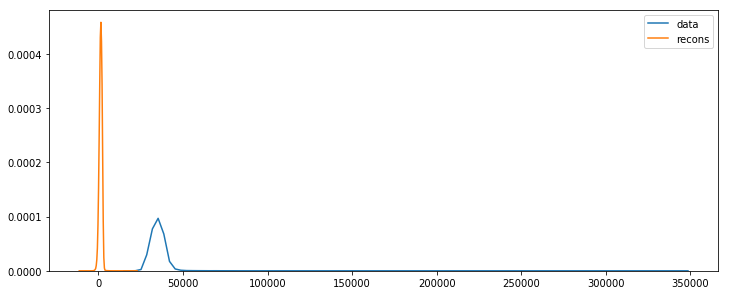

In [79]:
sb.kdeplot(beforenorm_val_Data.sum(axis=1).T,label="data")
sb.kdeplot(unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).T,label="recons")
print drv.information_mutual_normalised(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1)), mi(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1))

In [93]:
#calc_MI(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))
import sklearn
print sklearn.metrics.mutual_info_score(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1), contingency=None)
print sklearn.metrics.mutual_info_score(beforenorm_val_Data.sum(axis=1),beforenorm_val_Data.sum(axis=1), contingency=None)
print calc_MI2(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1))

12.6688281935
12.67863347
0.924113599152


In [68]:
#a = calc_MI2(beforenorm_val_Data.sum(axis=1),beforenorm_val_Data.sum(axis=1))
a,xaaa,yaaa,bins = calc_MI2(beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1))
#np.sqrt(1. - np.exp(-2 * a))

In [53]:
unnorm_reconstruct_val_Data[:,0:7,].sum(axis=1).shape

(339519,)

In [70]:
print xaaa[4], yaaa[4],bins
#print xaaa.shape, yaaa.shape,bins

-294.466 -294.466 453


In [71]:
from scipy.stats import chi2_contingency

def calc_MI(x, y):
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood",correction = True)
    mi = 0.5 * g / c_xy.sum()
    return mi

In [80]:
from sklearn.metrics import mutual_info_score

def calc_MI2(x, y):
    max_value = max(max(x),max(y))
    min_value = min(min(x),min(y))
    bins = min( len(np.histogram(x,'fd')[0]), len(np.histogram(y,'fd')[0]))
    bins_list = np.linspace(min_value, max_value, num=bins)
    c_xy,xaaa,yaaa = np.histogram2d(x, y, bins=(bins_list,bins_list))
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi #,xaaa,yaaa,bins

In [9]:
import numpy as np
def computeMI(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) #P(x)
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) #P(y)
    for i in xrange(len(x_value_list)):
        print len(x_value_list)
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/( P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi

In [19]:
beforenorm_val_Data.sum(axis=1).shape,unnorm_reconstruct_val_Data.sum(axis=1).shape

((339521,), (339521,))

In [18]:
mi(beforenorm_val_Data.sum(axis=1).T,unnorm_reconstruct_val_Data.sum(axis=1).T)
            

(0.86437577049774772, 1647)

In [67]:
rr = np.vstack((beforenorm_val_Data.sum(axis=1),unnorm_reconstruct_val_Data.sum(axis=1)))
rr.shape
drv.information_mutual(rr,base=np.exp(1))

array([[ 12.67863347,  12.6403848 ],
       [ 12.6403848 ,  12.69704241]])

In [46]:
beforenorm_val_Data.shape


(339521, 100)

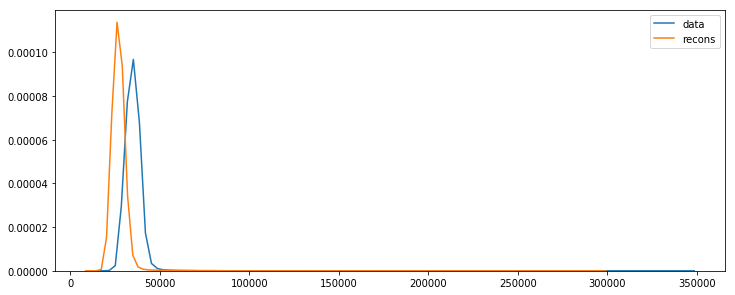

In [45]:
sb.kdeplot(beforenorm_val_Data.sum(axis=1).T,label="data")
sb.kdeplot(unnorm_reconstruct_val_Data.sum(axis=1).T,label="recons")

In [36]:
np.sqrt(1. - np.exp(-2 * a[0][1]))

0.99999999999999989

In [94]:
from pyitlib import discrete_random_variable as drv

In [95]:
X = np.array(((1,1,1,1), (1,1,2,2), (1,1,2,2)))
X.shape

(3, 4)

In [96]:
xx = pd.DataFrame(X)

In [5]:
#type(xx)
#drv.information_mutual(xx)
import numpy as np
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv')
df = df[['height', 'weight', 'base_experience']].apply(lambda s: pandas.qcut(s, 10, labels=False)) # Bin the data
drv.information_mutual_normalised(df.T) # Transposition required for comparing columns


/home/caducovas/.local/lib/python2.7/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)


array([[ 1.        ,  0.32452241,  0.17682195],
       [ 0.32781099,  1.        ,  0.13990528],
       [ 0.17861754,  0.13990821,  1.        ]])